# Importações

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
color = cm.coolwarm

# Hill Climbing

In [15]:
def hill_climbing( x, y, f, e, plot, max_it = 1000, max_n = 50, start_function=np.min, rotate=tuple()):
  fig,ax = plot
  x_best = np.array( [ [start_function(x)], [start_function(y)] ] )
  f_best = f(x_best[ 0, : ], x_best[ 1, : ])
  f_bests = [f_best]
  melhoria = True
  ax.scatter(x_best[0], x_best[1], [f_best], marker='x', s=90, linewidth=2, color = 'red')
  i = 0
  while i < max_it and melhoria:
    j = 0
    while j < max_n:
      melhoria = False
      y = np.random.uniform(low = x_best - e, high = x_best + e)
      F = f(y[0, :], y[1, :])
      if F > f_best:
        x_best = y
        f_best = F
        ax.scatter(x_best[0],x_best[1],[f_best], marker='x',s=90, linewidth=2, color='green')
        melhoria = True
        break
      f_bests.append(F)
      j = j+1
    i =i + 1
  if len(rotate) > 0:
    ax.view_init(rotate[0], rotate[1])
  ax = fig.add_subplot(1,2,2)
  g = np.linspace(0,1000,len(f_bests))
  ax.plot(g,f_bests)


# Local Random Search (LRS)

In [16]:
def local_random_search(x, y, f, sigma, plot, max_it=1000):
    fig, ax = plot
    c = np.array([x, y])
    l = c.min(axis=1)
    u = c.max(axis=1)
    x_best = np.random.uniform(l, u)
    f_best = f(x_best[0], x_best[1])
    ax.scatter([x_best[0]], [x_best[1]], [f_best], marker='x', s=90, linewidth=2, color='red')
    f_bests = [f_best]
    i = 0
    while i < max_it:
        n = np.random.normal(0, sigma)
        x_cand = x_best + n
        if (x_cand[0] > u[0]):
            x_cand[0] = u[0]
        if (x_cand[0] < l)[0]:
            x_cand[0] = l[0]

        if (x_cand[1] > u[1]):
            x_cand[1] = u[1]
        if (x_cand[1] < l[1]):
            x_cand[1] = l[1]

        f_cand = f(x_cand[0], x_cand[1])
        if (f_cand > f_best):
            x_best = x_cand
            f_best = f_cand
            ax.scatter(x_best[0], x_best[1], [f_best], marker='x', s=90, linewidth=2, color='green')

        f_bests.append(f_best)
        i = i + 1

    ax = fig.add_subplot(1, 2, 2)
    g = np.linspace(0, 1000, len(f_bests))
    ax.plot(g, f_bests)


# Global Random Search (GRS)

In [17]:
def global_random_search(x, y, f, plot, max_it=1000):
    fig, ax = plot
    c = np.array([x, y])
    l = c.min(axis=1)
    u = c.max(axis=1)
    x_best = np.random.uniform(l, u)
    f_best = f(x_best[0], x_best[1])
    ax.scatter([x_best[0]], [x_best[1]], [f_best], marker='x', s=90, linewidth=2, color='red')
    f_bests = [f_best]
    i = 0
    while i < max_it:
        x_cand = np.random.uniform(l, u)
        f_cand = f(x_cand[0], x_cand[1])
        if (f_cand > f_best):
            x_best = x_cand
            f_best = f_cand
            ax.scatter(x_best[0], x_best[1], [f_best], marker='x', s=90, linewidth=2, color='green')

        f_bests.append(f_best)
        i = i + 1

    ax = fig.add_subplot(1, 2, 2)
    g = np.linspace(0, 1000, len(f_bests))
    ax.plot(g, f_bests)


# Simulated Annealing (Tempera Simulada)

In [18]:
def simulated_annealing(x, y, f, sigma, t, plot, max_it=1000, tipo_escalonamento=1, heat=0 ):
    t_anterior = t

    def p(x_cand, x_best):
        return np.exp(-((f(x_cand[0], x_cand[1]) - f(x_best[0], x_best[1]))/t))

    def escalonamento():
        nonlocal t_anterior
        nonlocal t
        if tipo_escalonamento == 1:
            t = 0.99 * t
        elif tipo_escalonamento == 2:
            t = t / 1 + (0.99 * np.sqrt(t))
        elif tipo_escalonamento == 3:
            t = t / 1 + (t / 1 + (t_anterior - t / (i - 1) * t_anterior * t) * np.sqrt(t))

    fig, ax = plot
    c = np.array([x, y])
    l = c.min(axis=1)
    u = c.max(axis=1)
    x_best = np.random.uniform(l, u)
    f_best = f(x_best[0], x_best[1])
    ax.scatter([x_best[0]], [x_best[1]], [f_best], marker='x', s=90, linewidth=2, color='red')
    f_bests = [f_best]
    i = 0
    while i < max_it:
        n = np.random.normal(0, sigma)
        x_cand = x_best + n
        if (x_cand[0] > u[0]):
            x_cand[0] = u[0]
        if (x_cand[0] < l)[0]:
            x_cand[0] = l[0]

        if (x_cand[1] > u[1]):
            x_cand[1] = u[1]
        if (x_cand[1] < l[1]):
            x_cand[1] = l[1]

        f_cand = f(x_cand[0], x_cand[1])
        if (f_cand > f_best):
            x_best = x_cand
            f_best = f_cand
            ax.scatter(x_best[0], x_best[1], [f_best], marker='x', s=90, linewidth=2, color='green')
        elif (p(x_cand, x_best) >= np.random.uniform(0,1)):
            x_best = x_cand
            f_best = f_cand
            ax.scatter(x_best[0], x_best[1], [f_best], marker='x', s=90, linewidth=2, color='green')
        t_anterior = t
        # print(t_anterior)
        escalonamento()
        # print(t)
        f_bests.append(f_best)
        if tipo_escalonamento == 1 and t <= heat:
            break
        if (tipo_escalonamento == 2 or tipo_escalonamento == 3) and t >= heat:
            break
        i = i + 1

    ax = fig.add_subplot(1, 2, 2)
    g = np.linspace(0, 1000, len(f_bests))
    ax.plot(g, f_bests)

# Funções de plotagem

In [19]:
def hill_climbing_plot(x1, x2, f, e, start_function=np.min, rotate=tuple()):
    x, y = np.meshgrid(x1, x2)
    z = f(x,y)

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.plot_surface(x ,y, z, rstride=50, cstride=50, cmap=color, alpha=1, antialiased=False)
    hill_climbing(x1, x2, f, e, (fig,ax), start_function=start_function, rotate=rotate)
    plt.show()

def local_random_search_plot(x1, x2, f, sigma):
    x, y = np.meshgrid(x1, x2)
    z = f(x,y)

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.plot_surface(x ,y, z, rstride=50, cstride=50, cmap=color, alpha=0.6)
    local_random_search(x1,x2,f, sigma,(fig,ax))
    plt.show()

def global_random_search_plot(x1, x2, f):
    x, y = np.meshgrid(x1, x2)
    z = f(x,y)

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.plot_surface(x ,y, z, rstride=50, cstride=50, cmap=color, alpha=0.6)
    global_random_search(x1,x2,f,(fig,ax))
    plt.show()

def simulated_annealing_plot(x1, x2, f, sigma, t, tipo_escalonamento, heat):
    x, y = np.meshgrid(x1, x2)
    z = f(x,y)

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.plot_surface(x ,y, z, rstride=50, cstride=50, cmap=color, alpha=0.6)
    simulated_annealing(x1,x2, f, sigma, t, (fig,ax),tipo_escalonamento=tipo_escalonamento,heat=heat)
    plt.show()

# $f(x,y) = x^2 + y^2$

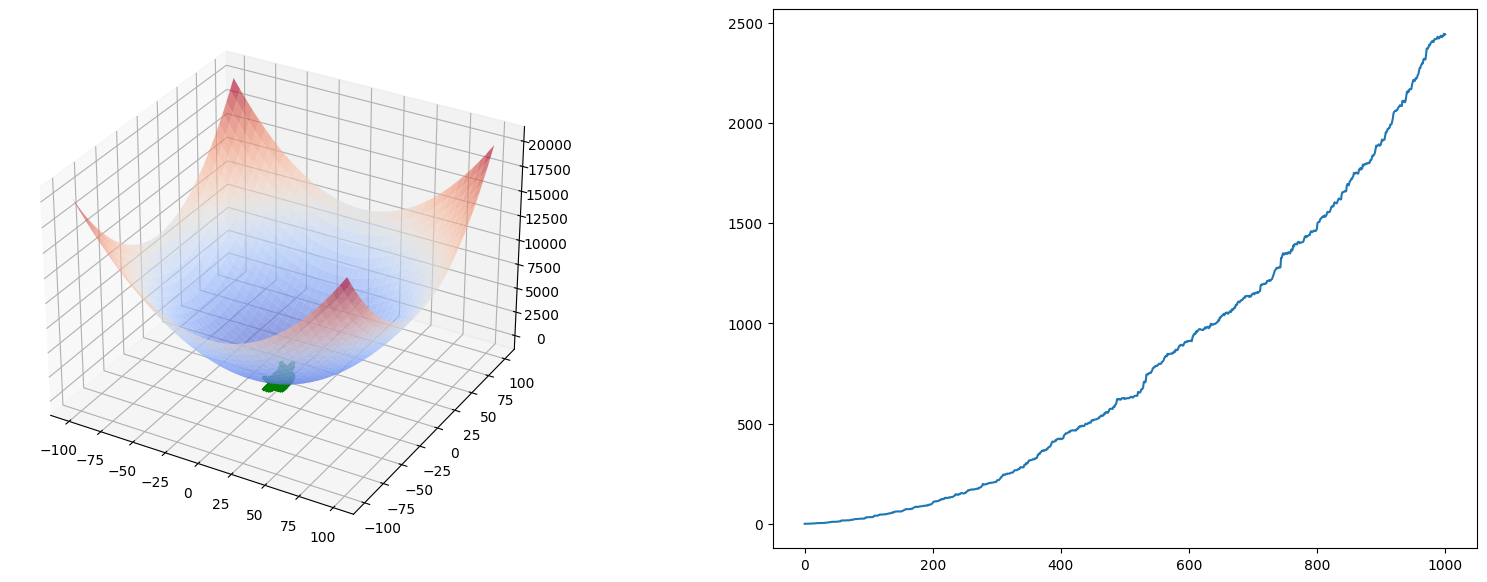

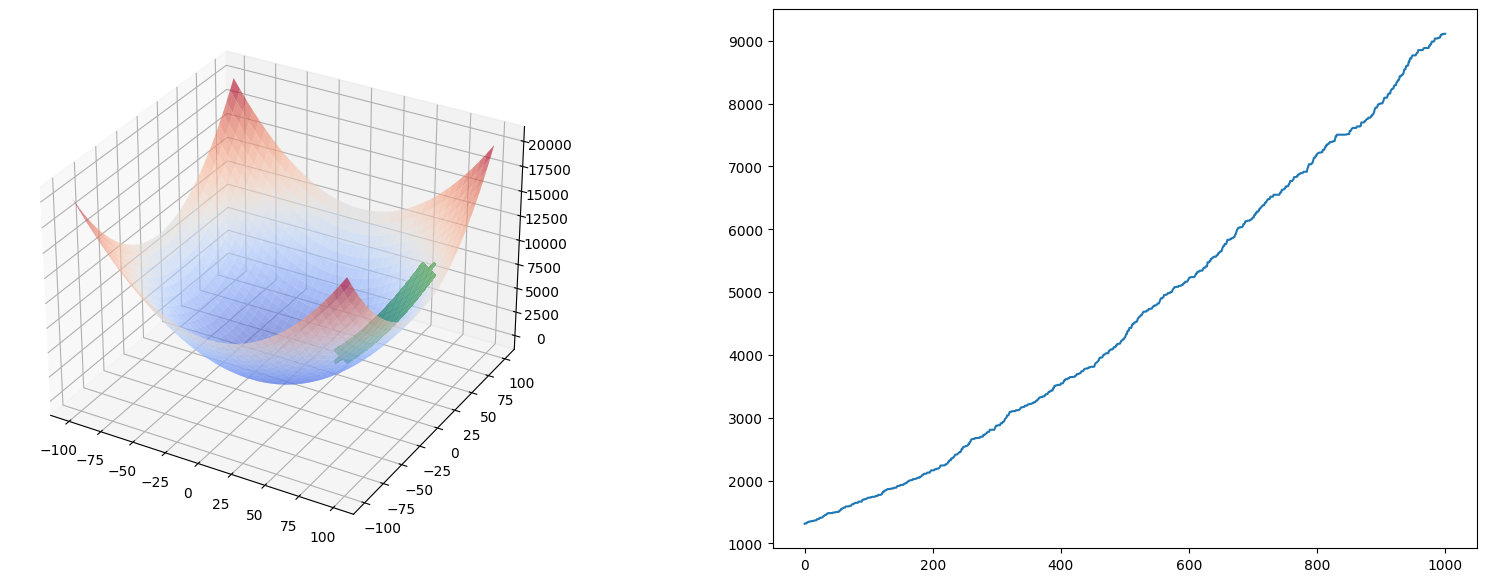

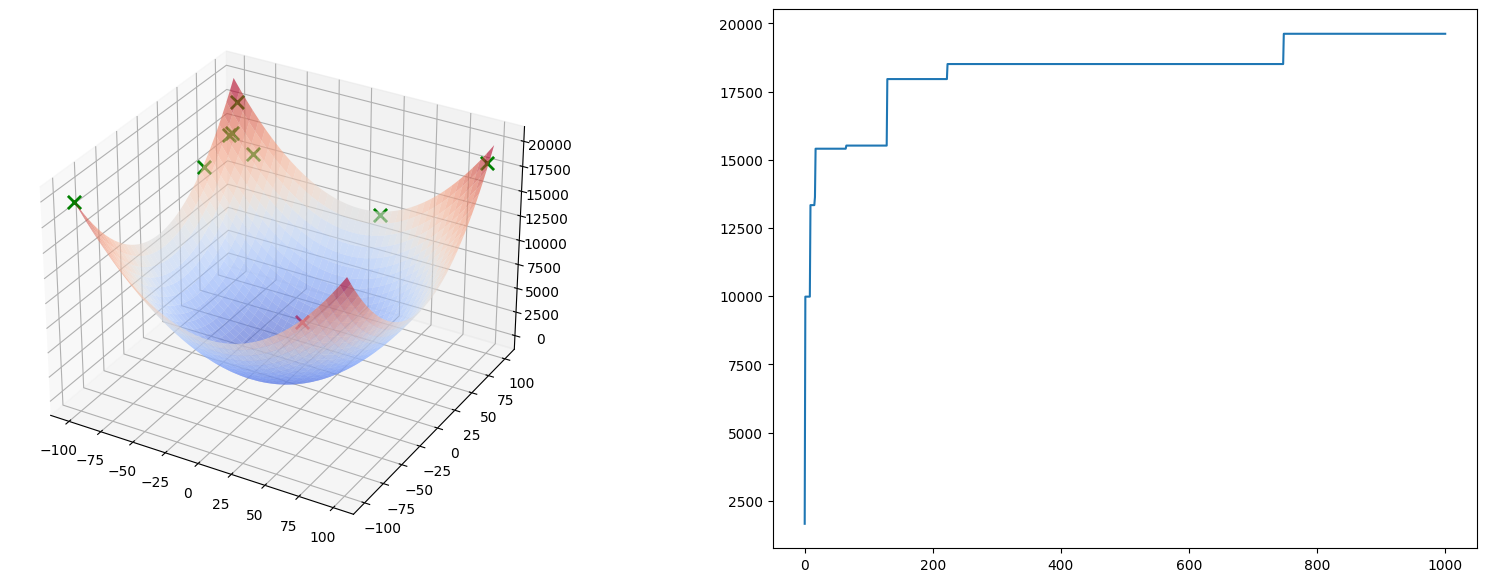

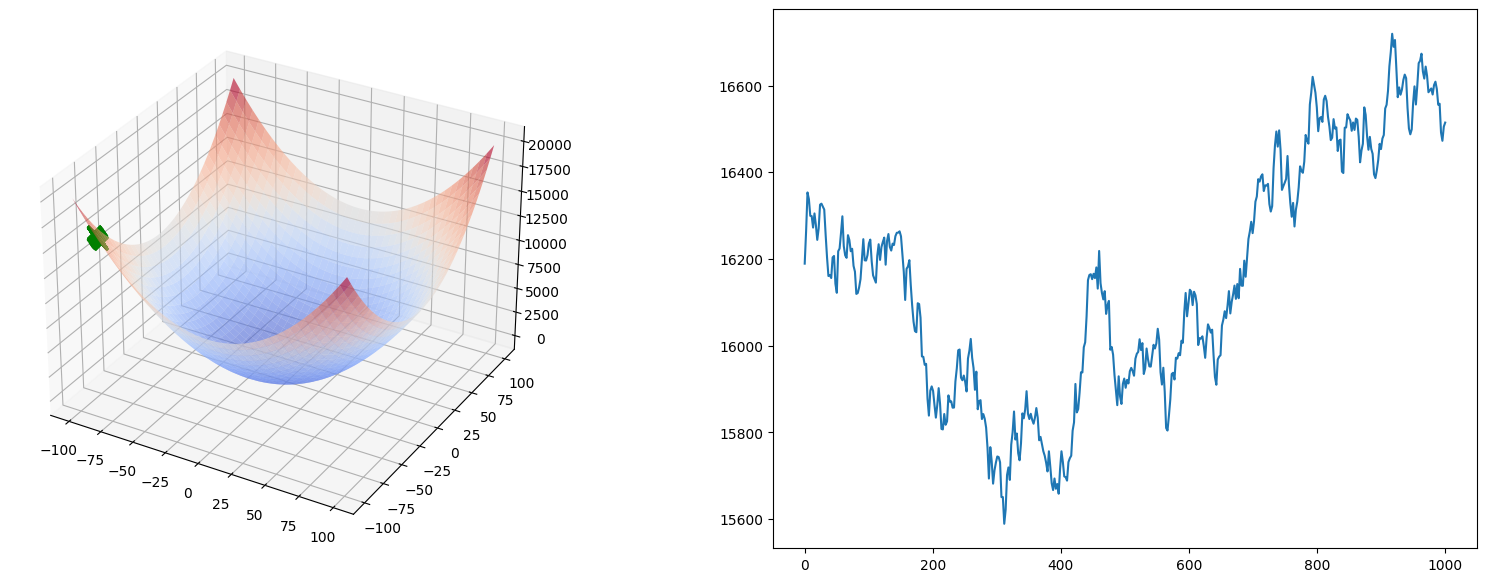

In [ ]:
def f(x1, x2):
  return (x1**2) + (x2**2)

x1 = np.linspace(-100, 100, 2000)
x2 = np.linspace(-100, 100, 2000)

hill_climbing_plot(x1,x2,f,0.1,start_function=np.mean)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)



# $f( x, y) = e^{-(x² + y²)} + 2 ⋅e^{-(x-1.7)^2 + (y - 1.7)^2}$

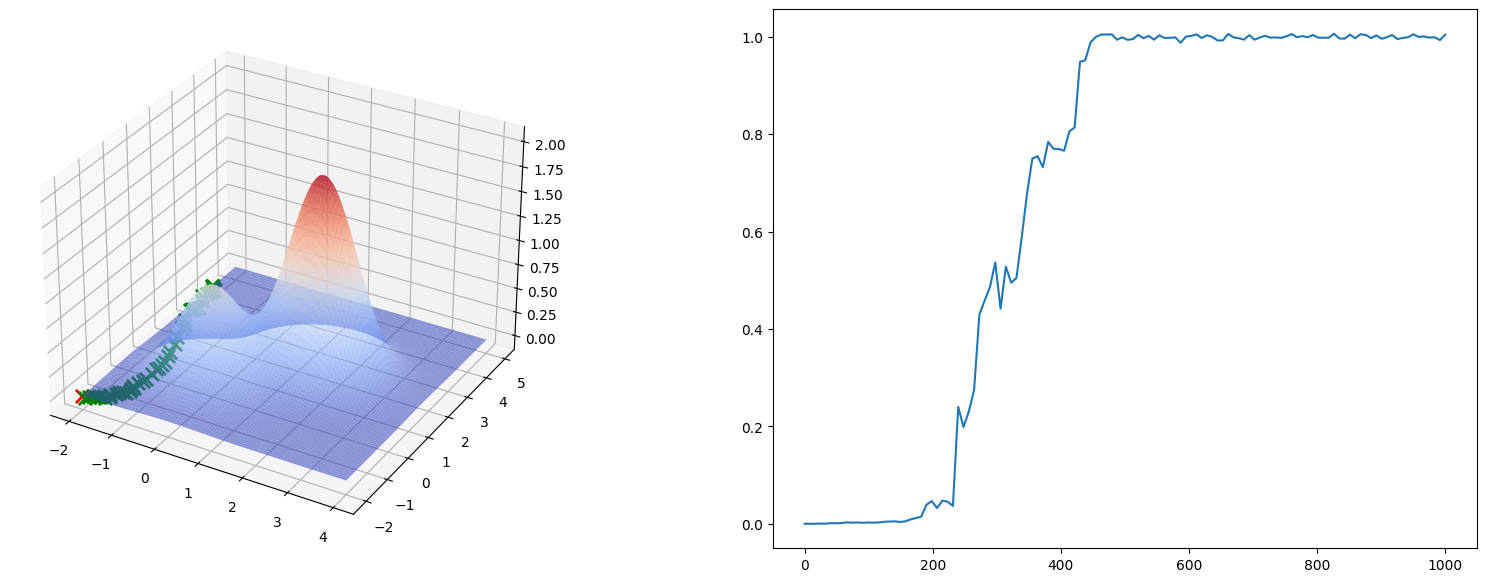

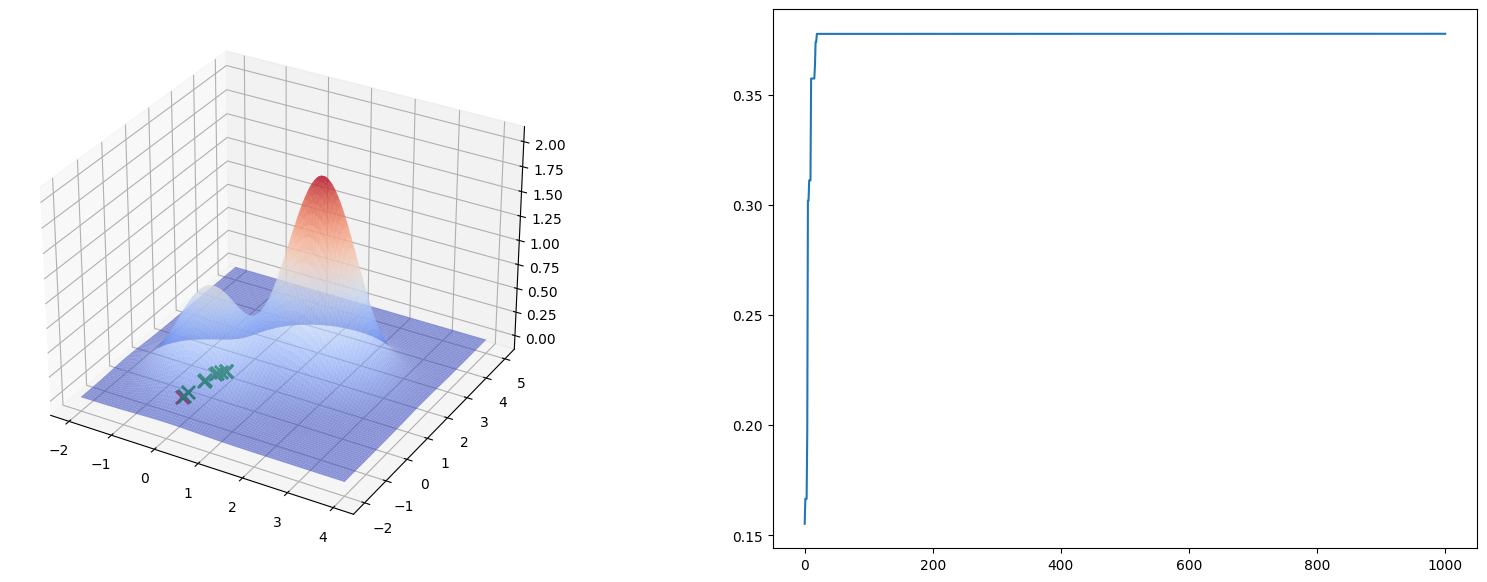

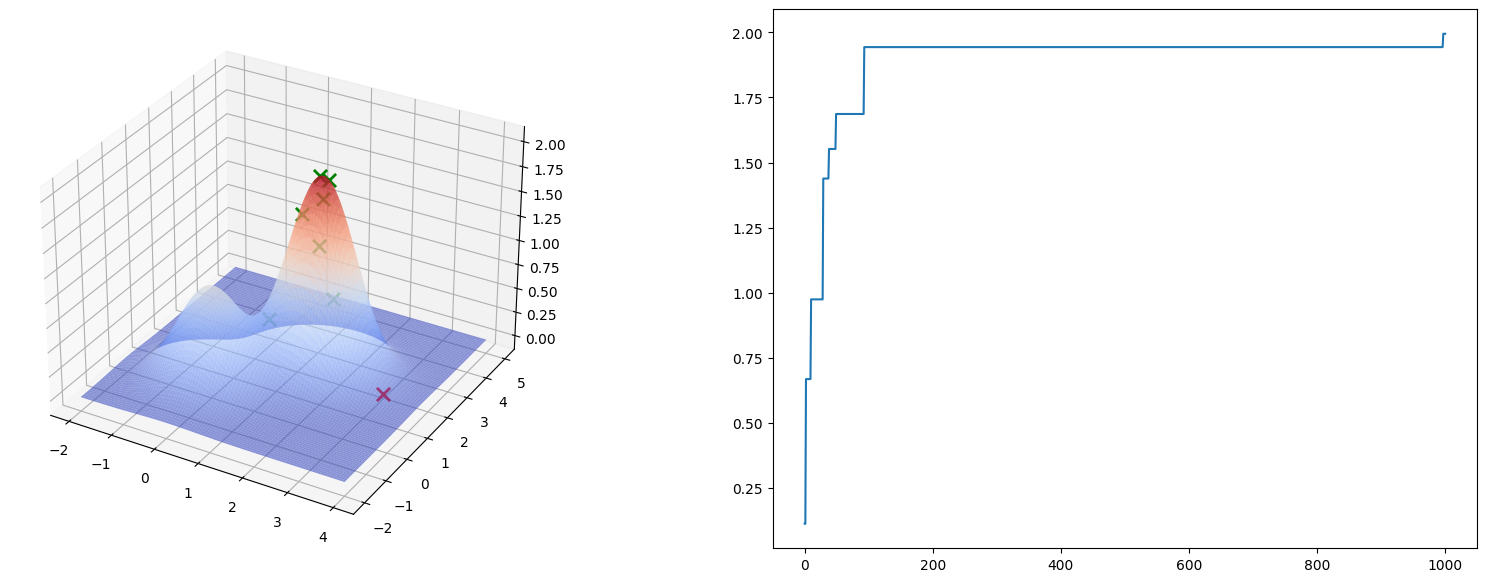

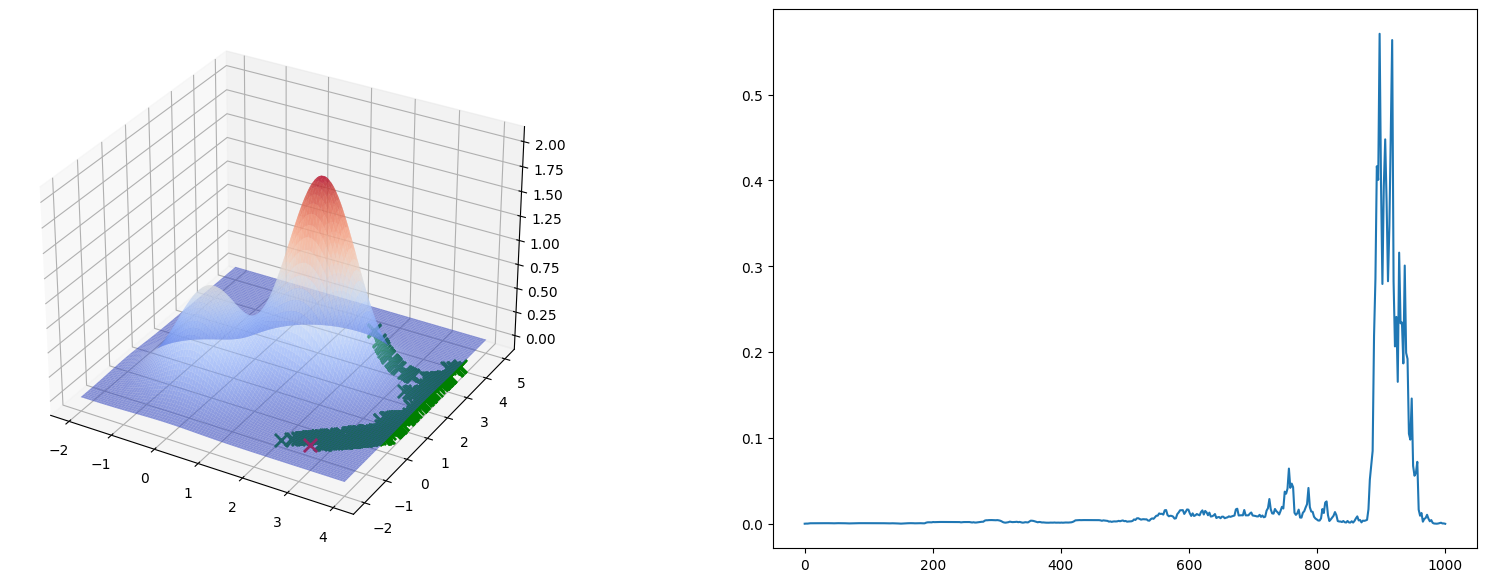

In [ ]:
def f(x1, x2):
  termo_1 = np.exp(-((x1**2) + (x2**2)))
  termo_2 = np.exp(-(((x1 - 1.7)**2) + ((x2 - 1.7)**2)))
  return termo_1 + 2 * termo_2

x1 = np.linspace(-2, 4, 5000)
x2 = np.linspace(-2, 5, 5000)

hill_climbing_plot(x1,x2,f,0.1)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)



# $f(x,y) = -20 \cdot e^{-0.2 \cdot \sqrt{-0.5 \cdot (x^2 + y^2)}} - e^{0.5 \cdot cos(2πx) + cos(2 \pi y) } + 20 + e^{1}$

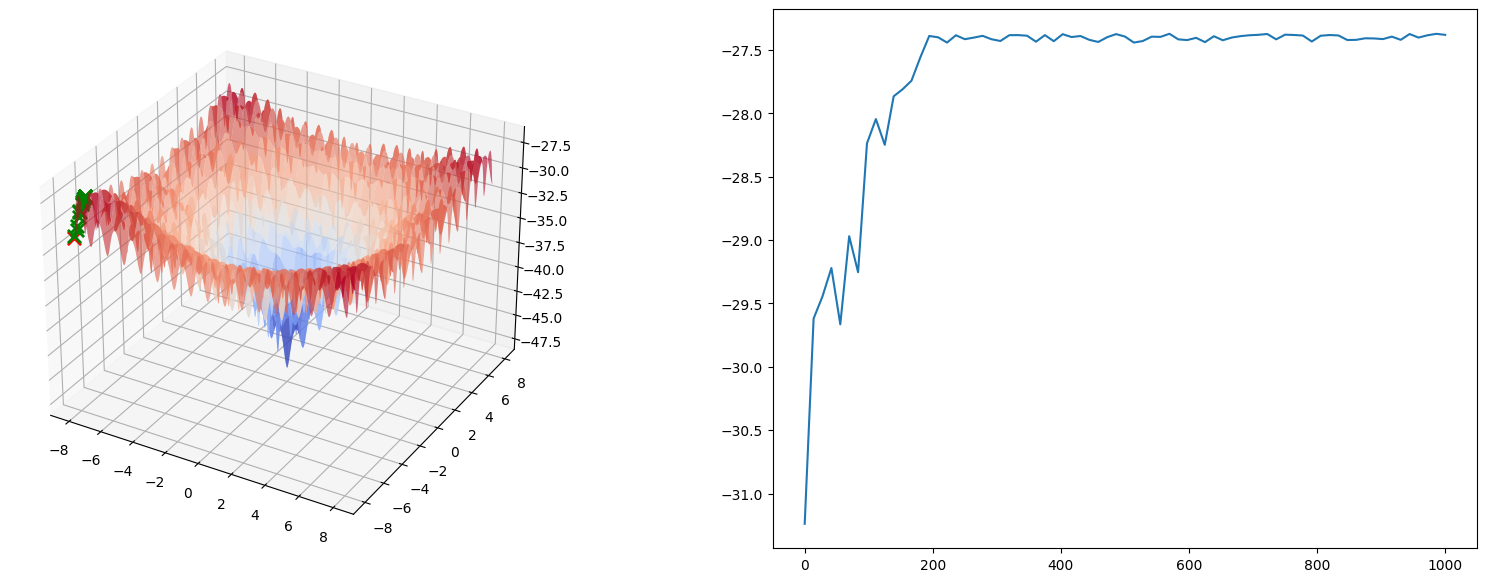

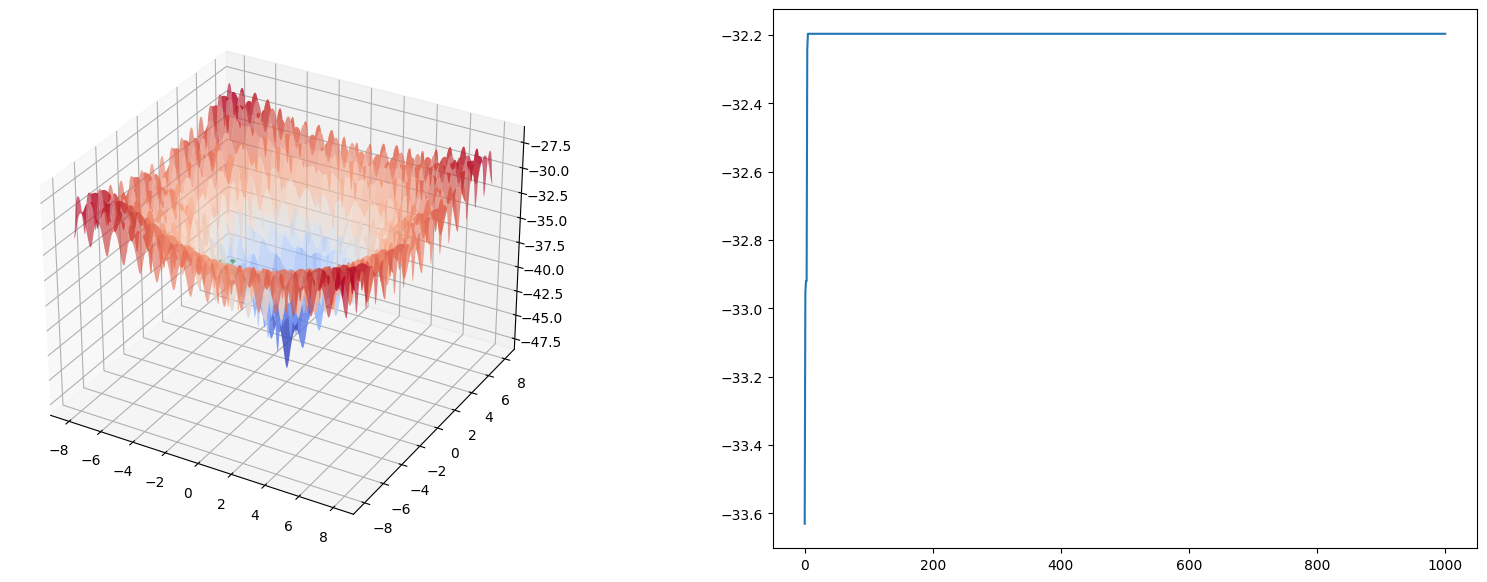

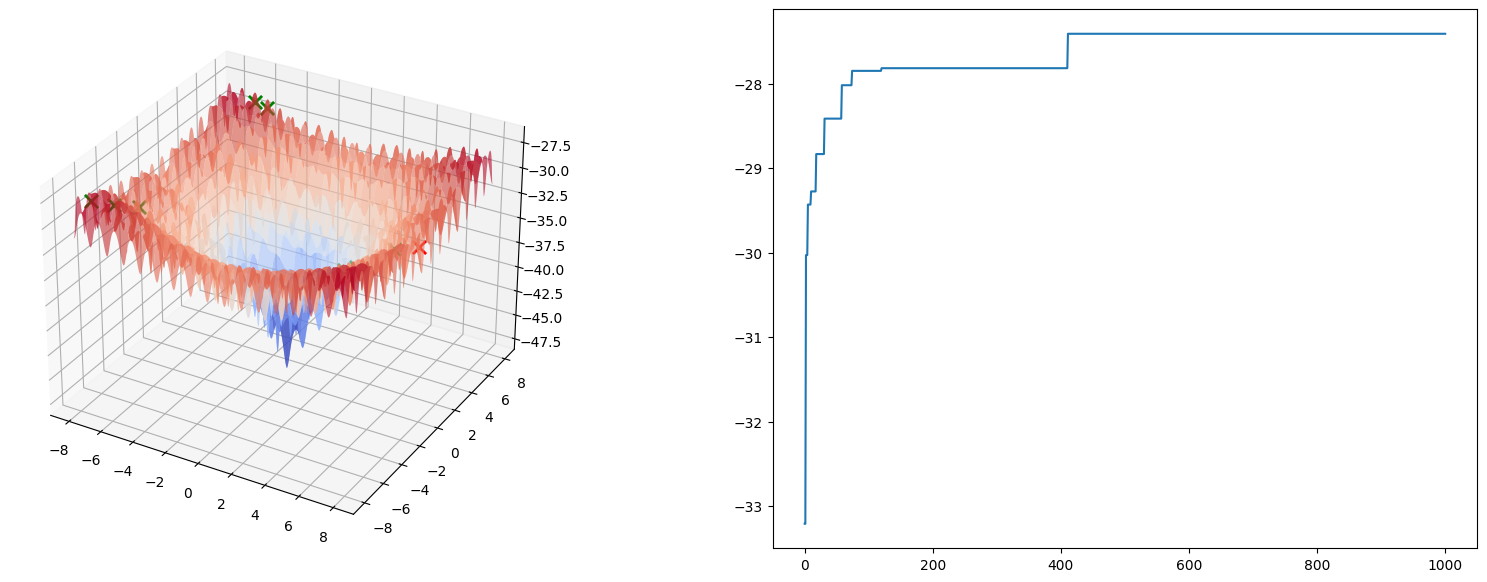

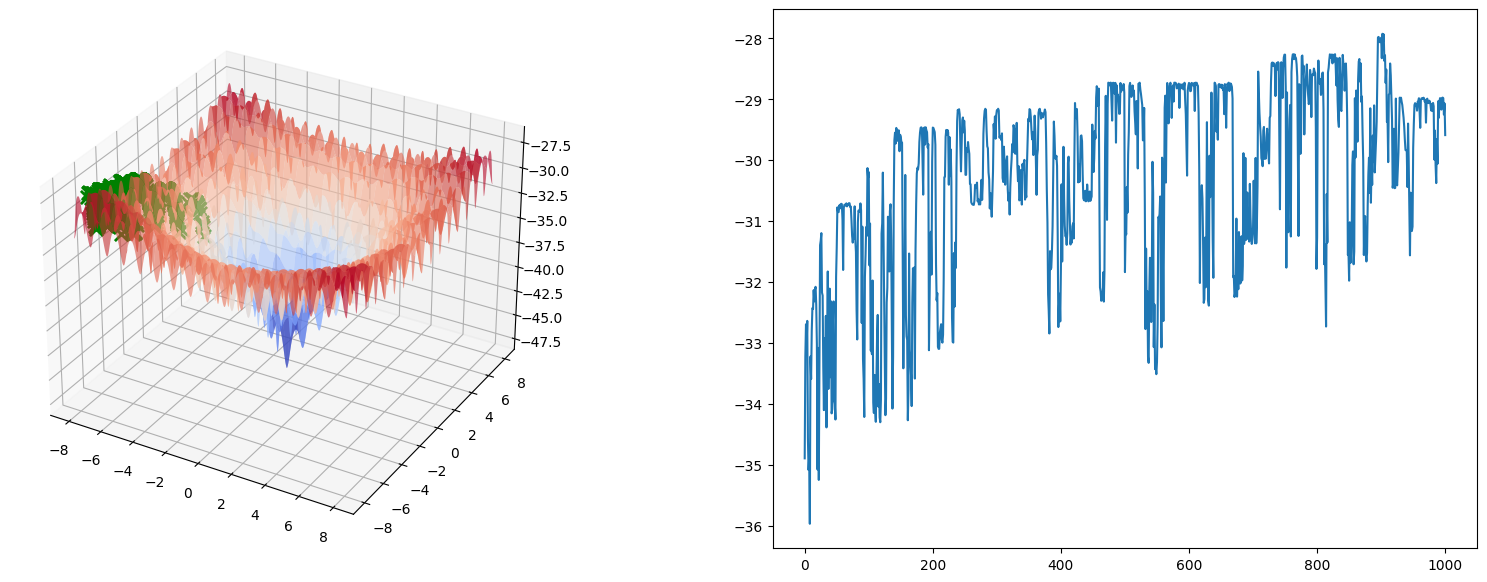

In [ ]:
def f(x1, x2):
  termo_1 = -20 * np.exp(-0.2 * np.sqrt(0.5 *((x1**2) + (x2**2))))
  termo_2 = np.exp(0.5* (np.cos(2 * np.pi * x1)) + np.cos(2 * np.pi * x2)) + 20 + np.exp(1)
  return termo_1 - termo_2

x1 = np.linspace(-8, 8, 1000)
x2 = np.linspace(-8, 8, 1000)

hill_climbing_plot(x1,x2,f,0.1)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,0)


# $f(x, y) = (x² - 10 \cdot cos(2\pi x) + 10) + (y² - 10 \cdot cos(2 \pi y) +10$

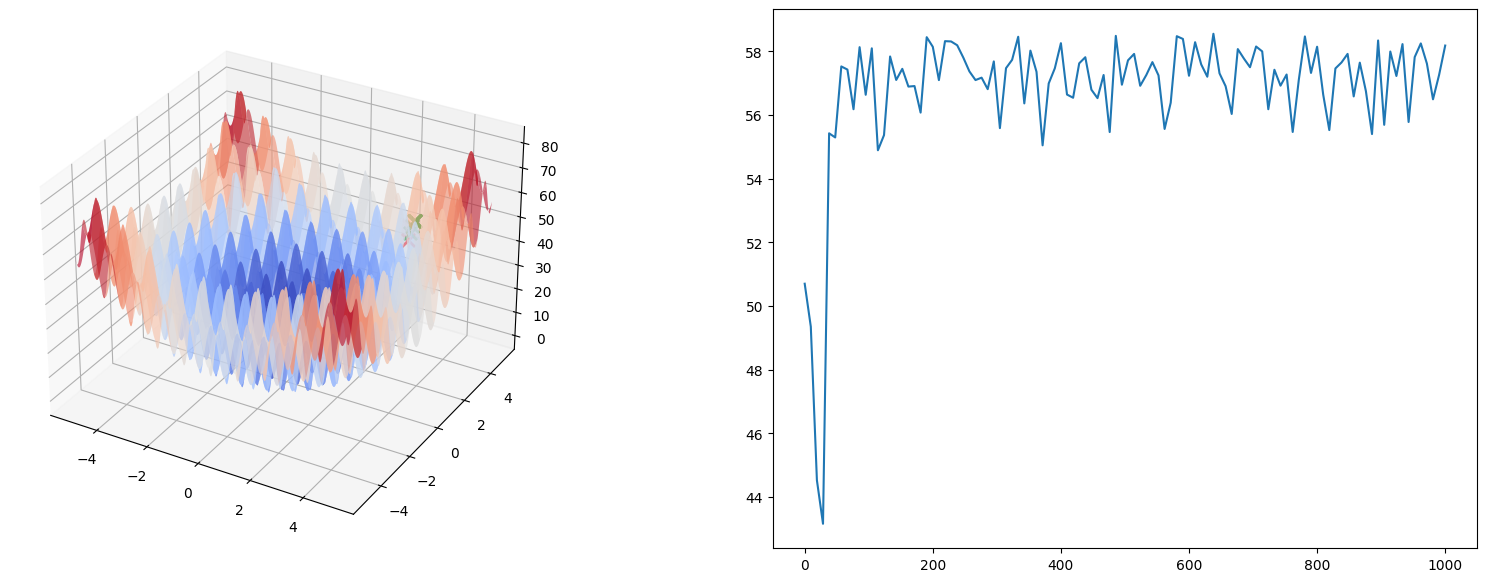

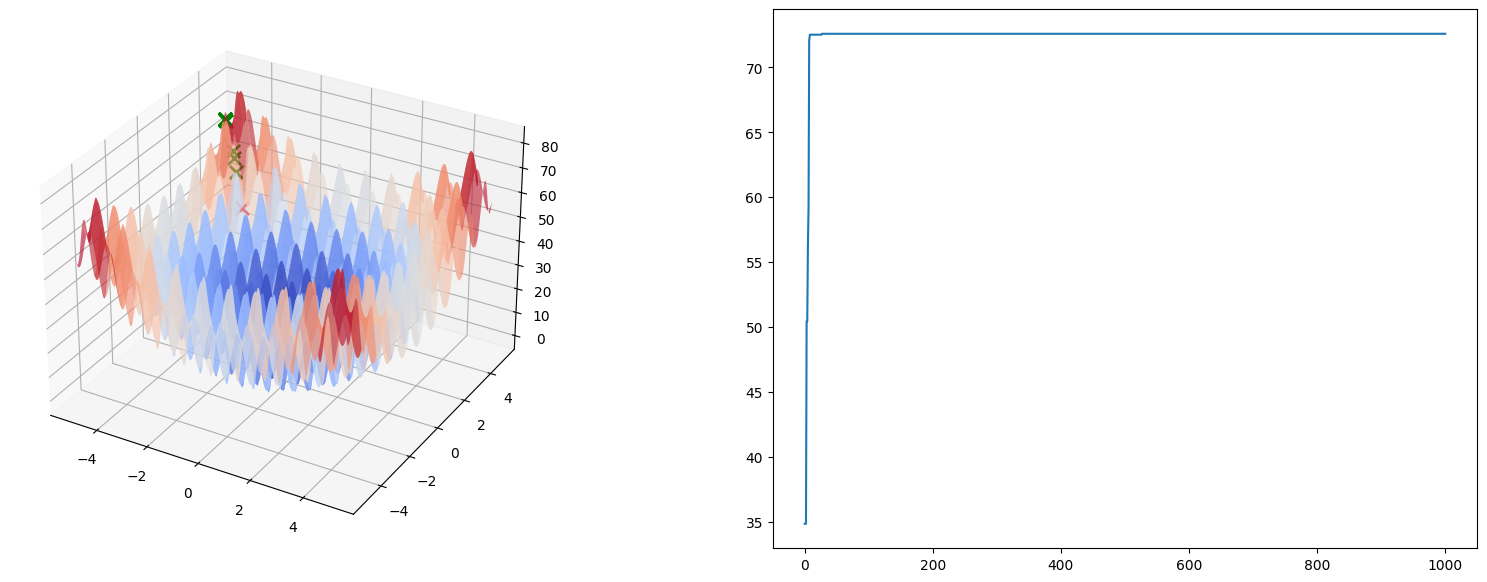

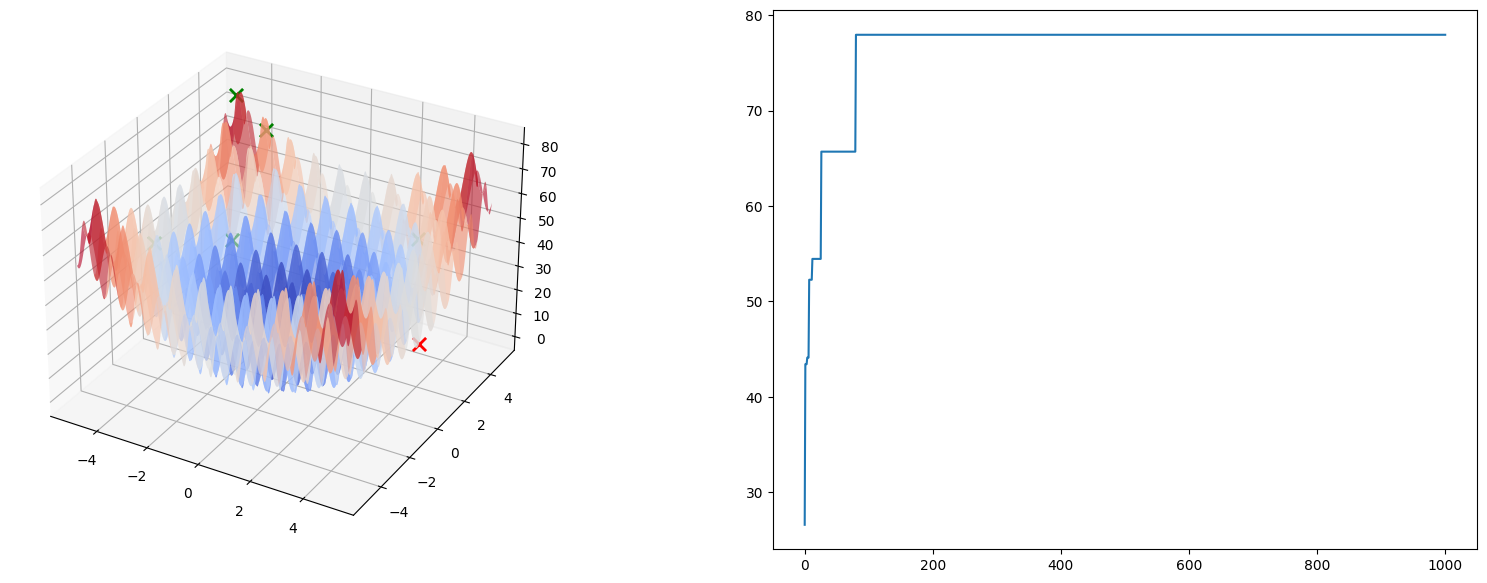

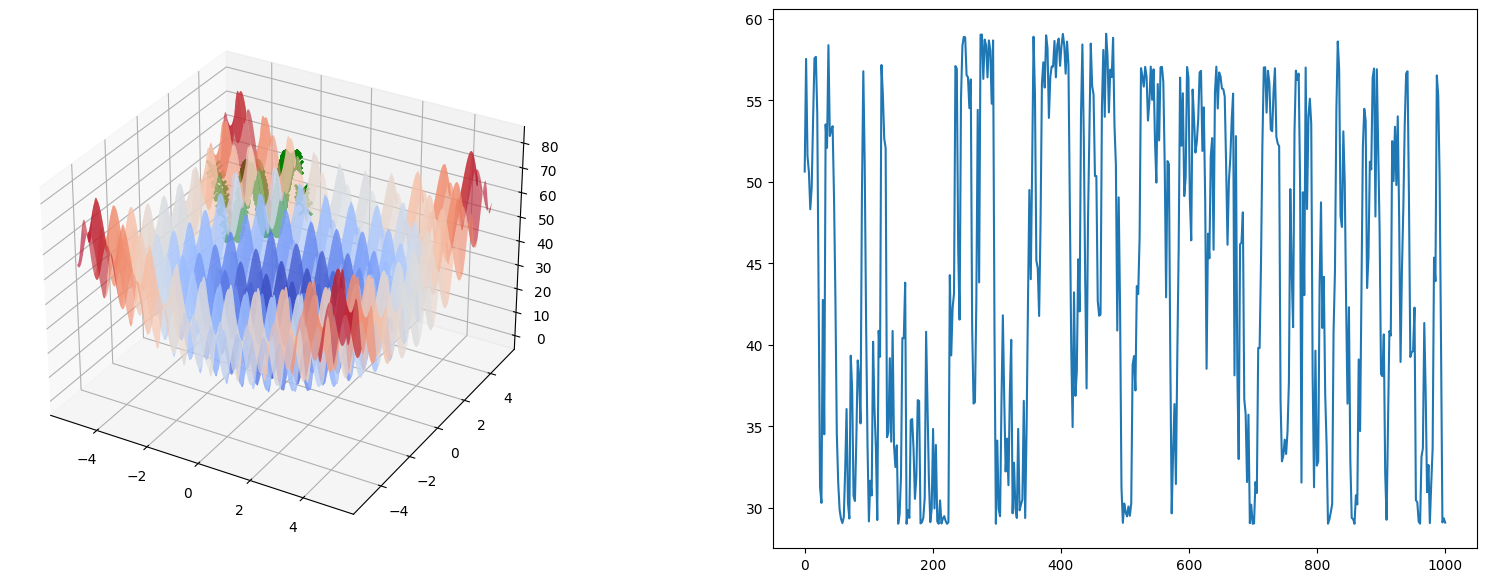

In [ ]:
def f(x1, x2):
  termo_1 = x1**2 - 10 * np.cos(2 * np.pi * x1) + 10
  termo_2 = x2**2 - 10 * np.cos(2 * np.pi * x2) + 10
  return termo_1 + termo_2

x1 = np.linspace(-5.12, 5.12, 1000)
x2 = np.linspace(-5.12, 5.12, 1000)

x, y = np.meshgrid(x1, x2)
z = f(x,y)

hill_climbing_plot(x1,x2,f,0.1, np.random.choice)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)


# $f (x, y) = (x - 1)^2 + 100 \cdot (y - x^2)^2$

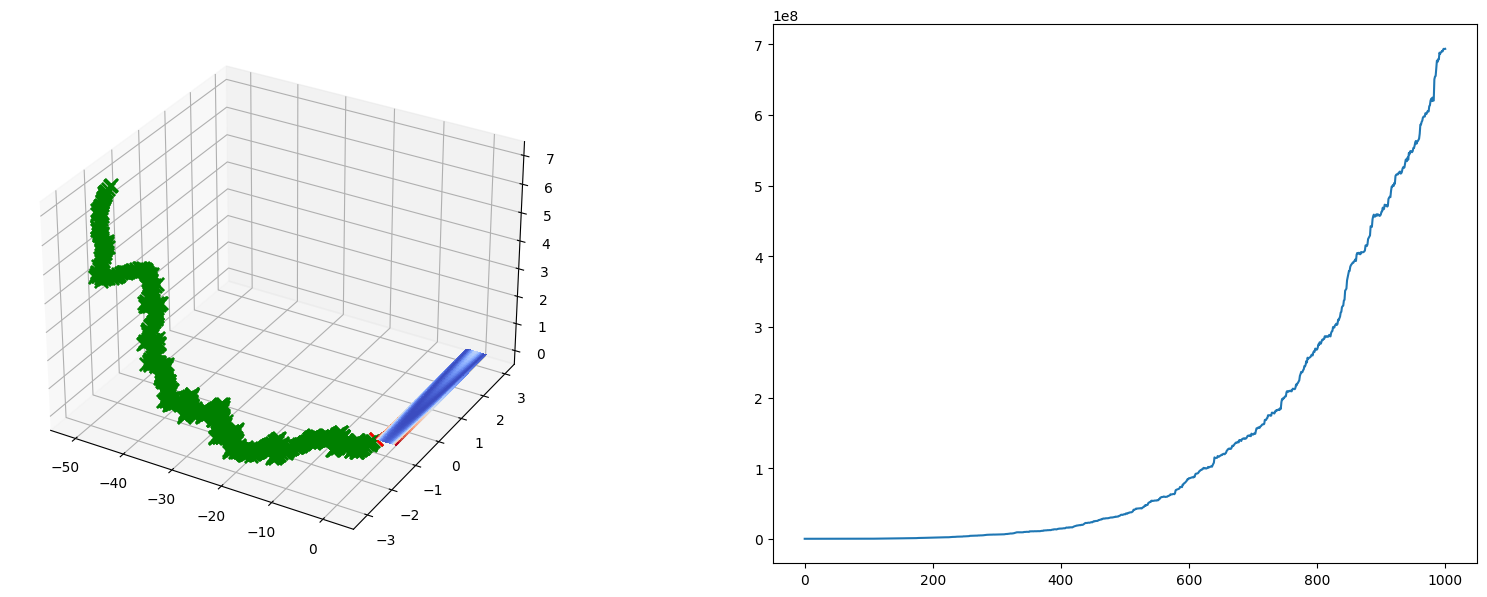

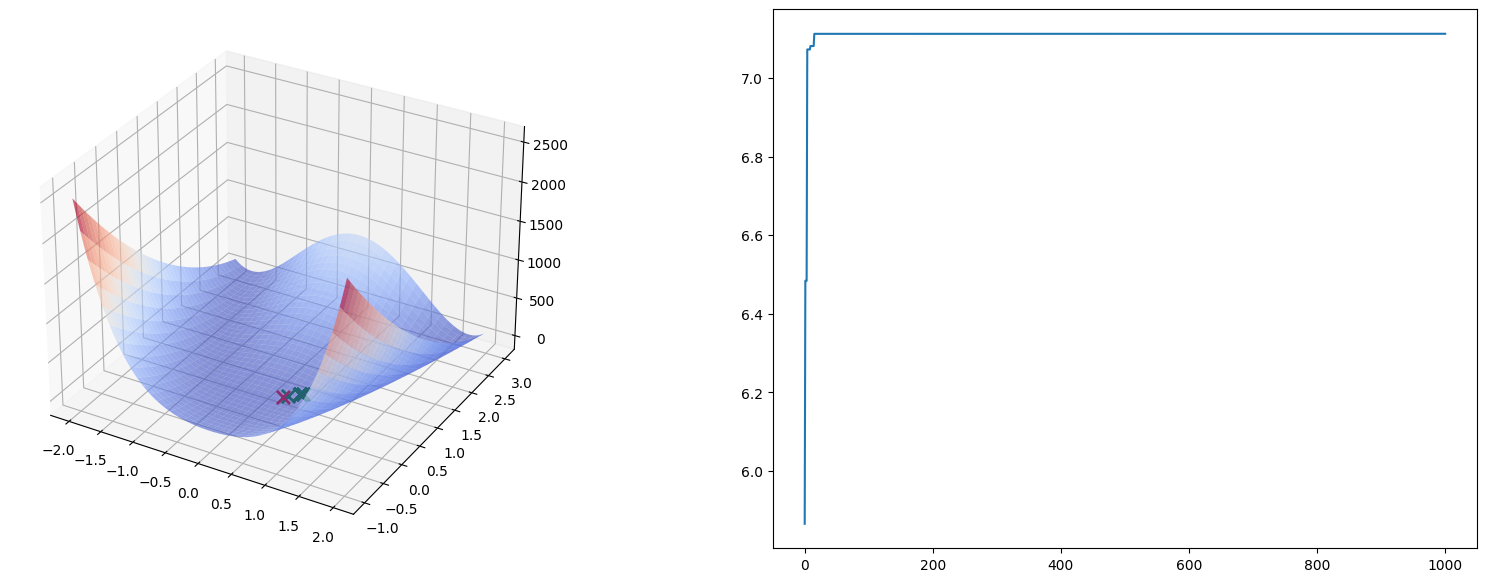

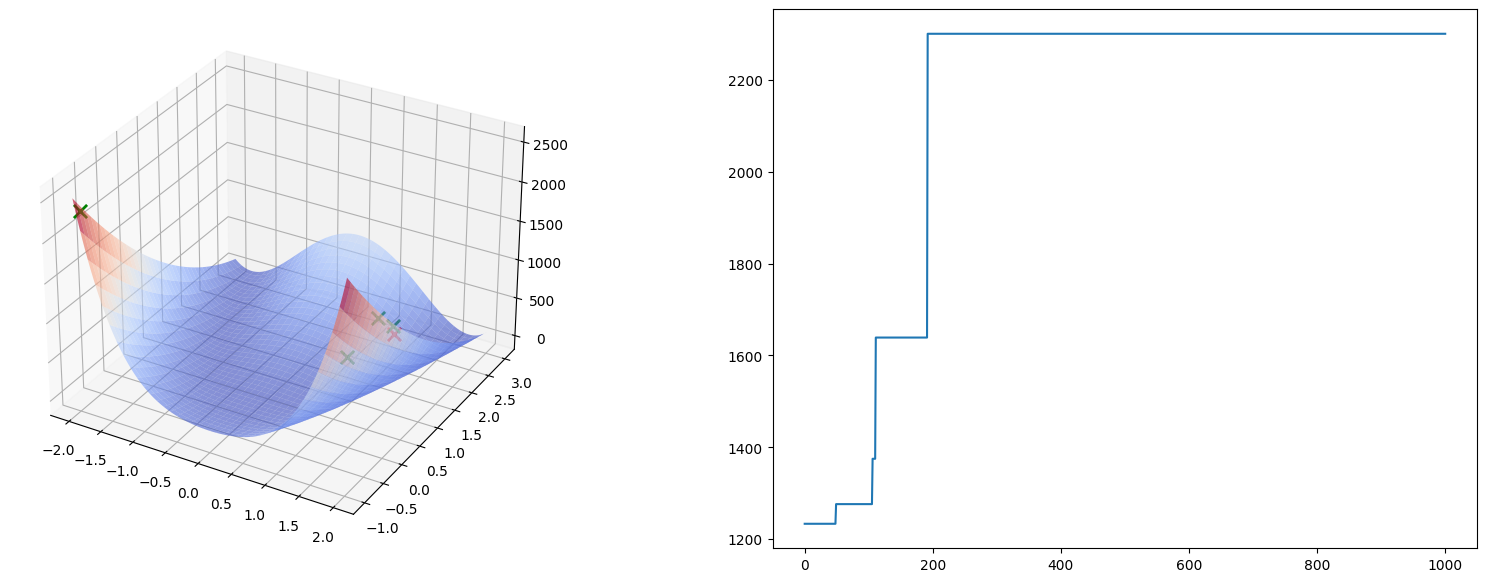

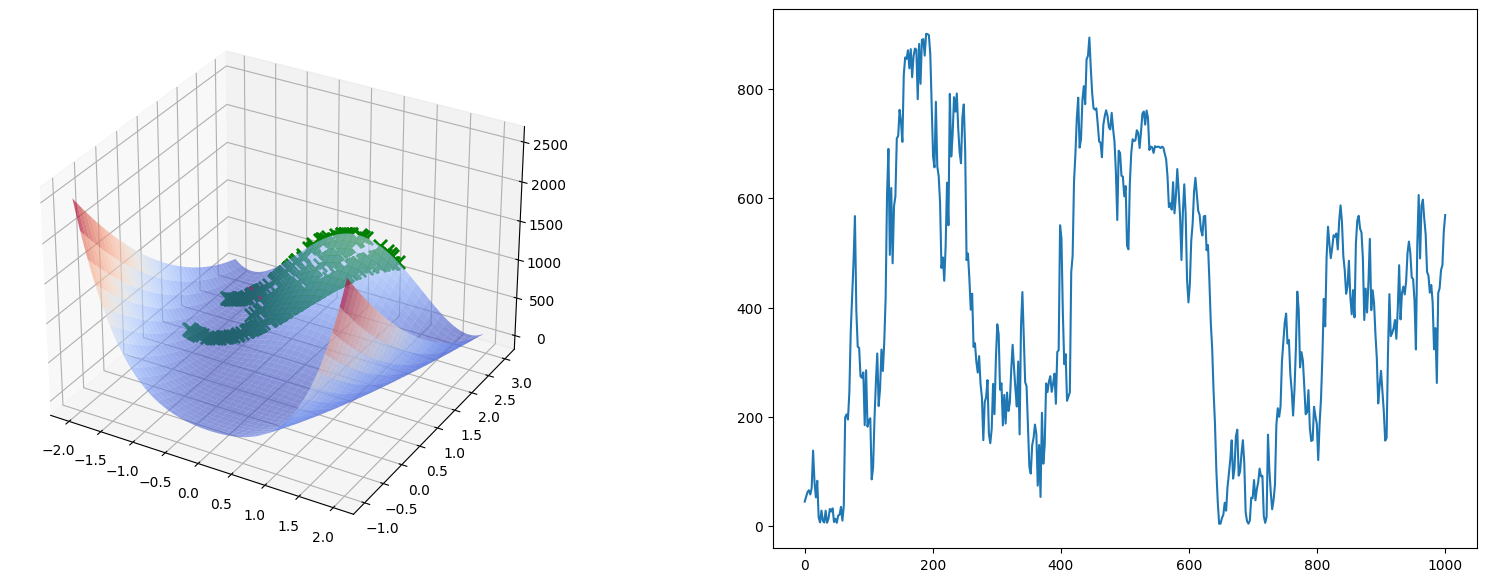

In [20]:
def f(x1, x2):
  termo_1 = ((x1 - 1) ** 2) + 100 * (x2 - (x1**2))**2
  return termo_1

x1 = np.linspace(-2, 2, 2000)
x2 = np.linspace(-1, 3, 2000)

# for x,y in zip(range(0, 360, 15),range(0, 360, 15)):
hill_climbing_plot(x1,x2,f,0.1)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)


# $f(x,y) = x \cdot sin(4\pi x) - y \cdot sin(4\pi y + \pi) + 1$

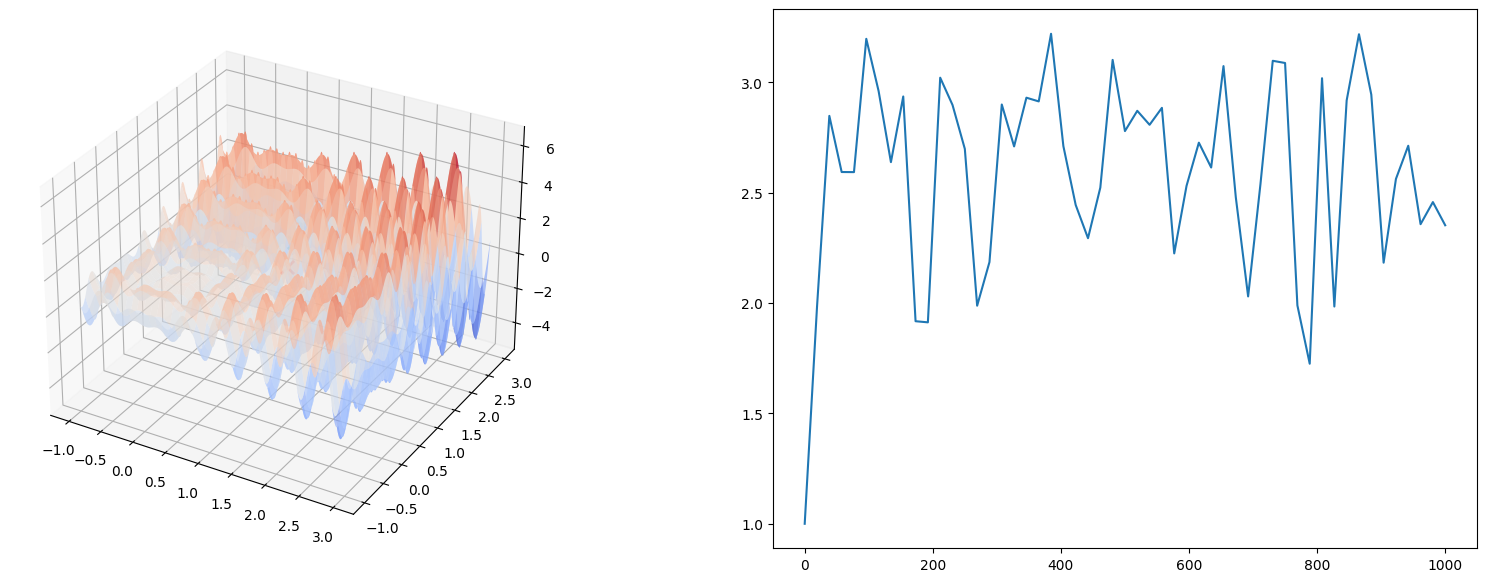

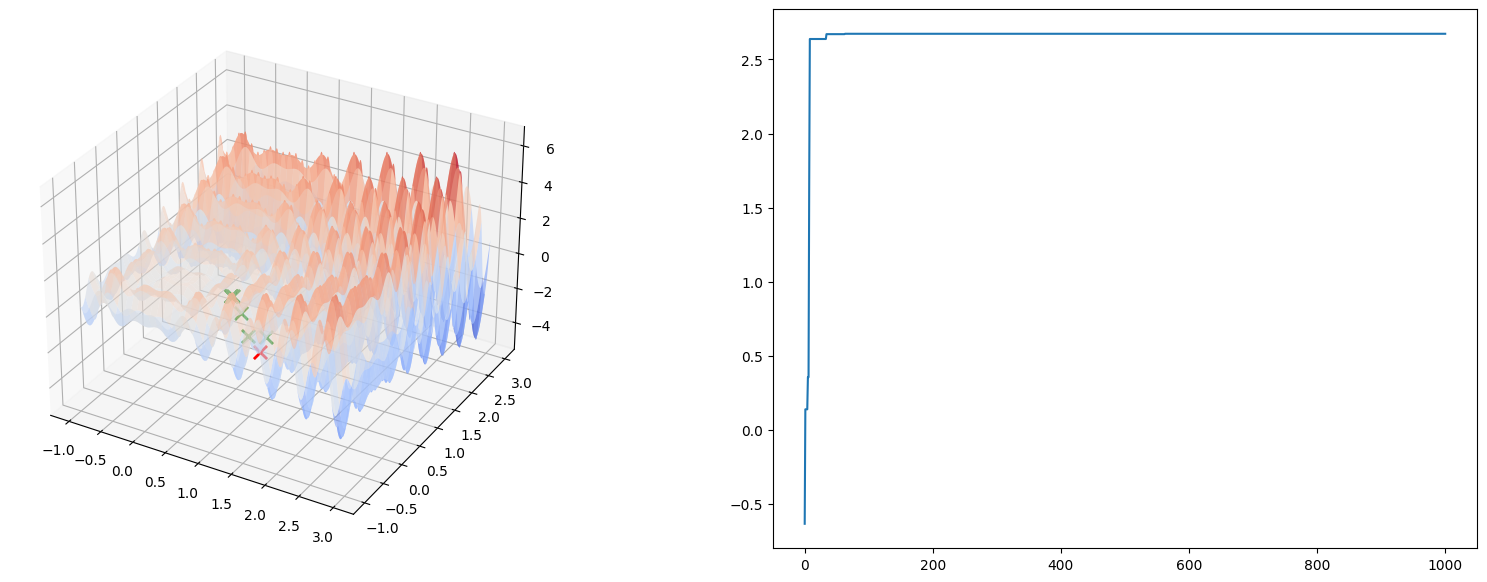

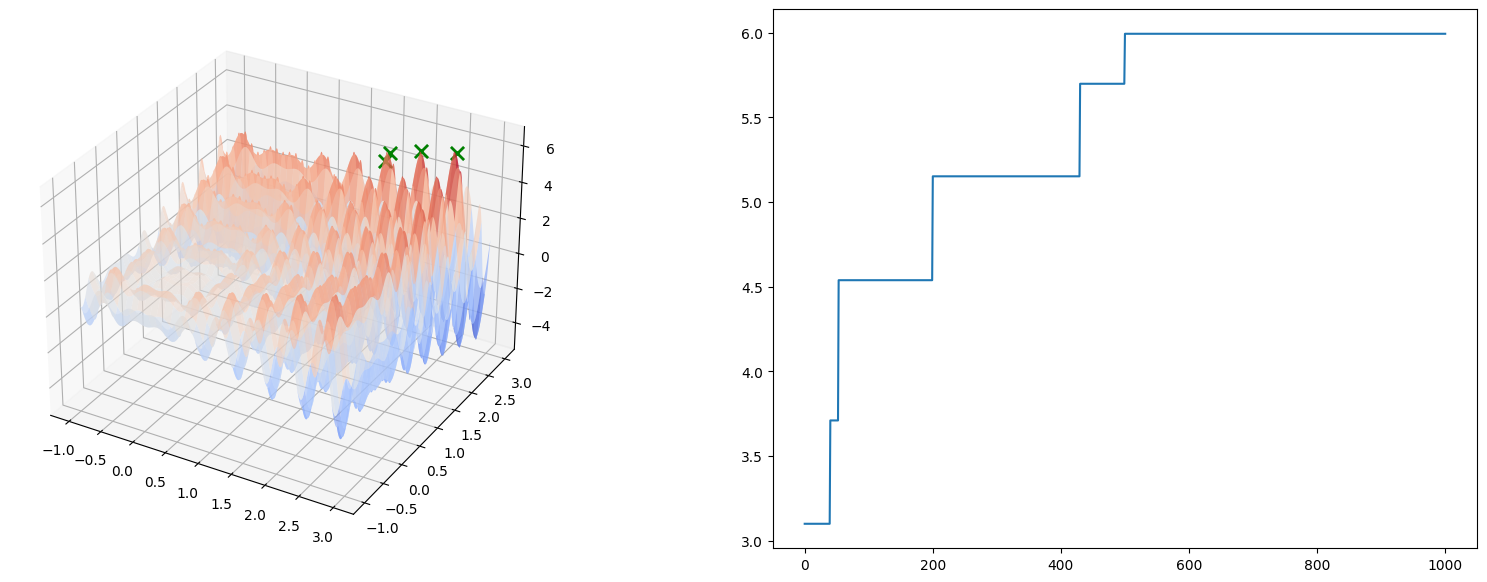

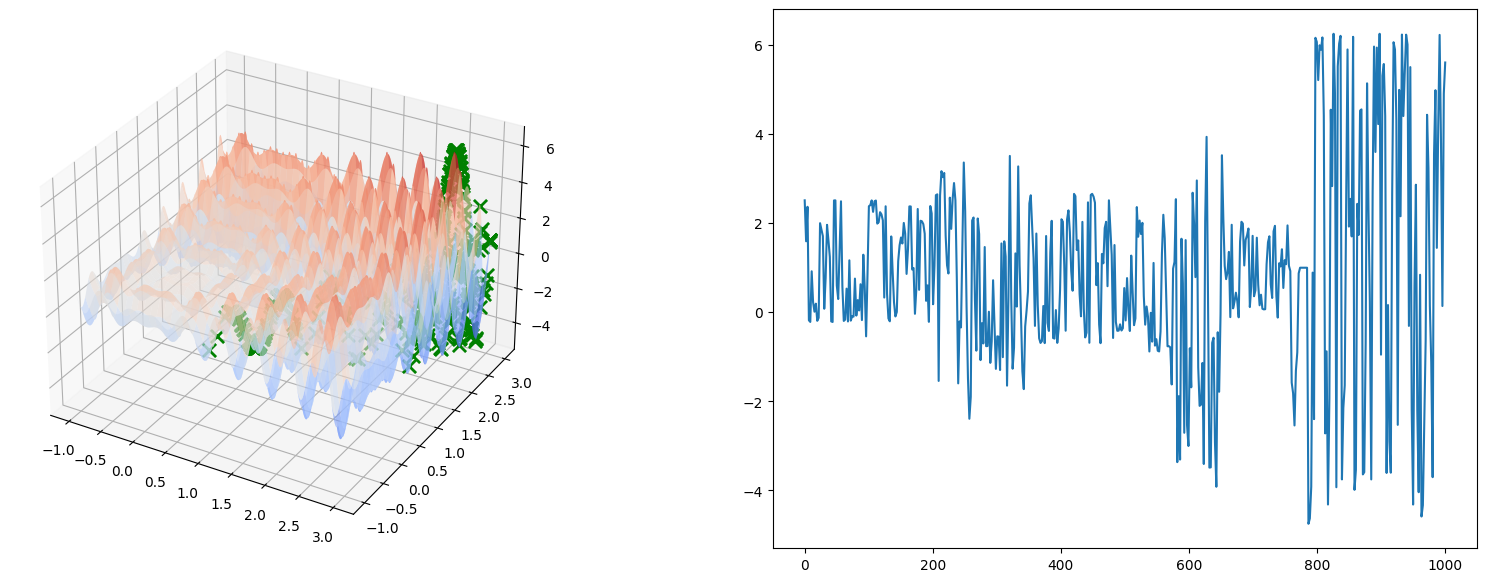

In [ ]:
def f(x1, x2):
  termo_1 = x1 * np.sin(4 * np.pi * x1)
  termo_2 = x2 * np.sin(4 * np.pi * x2 + np.pi)
  return termo_1 - termo_2 + 1

x1 = np.linspace(-1, 3, 2000)
x2 = np.linspace(-1, 3, 2000)

hill_climbing_plot(x1,x2,f,0.1, np.mean)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)


# $f(x,y) = -sin(x) \cdot sin(x^2/π)^{2 \cdot 10} - sin(y) \cdot sin(2y^2/\pi)^{2 \cdot 10}$

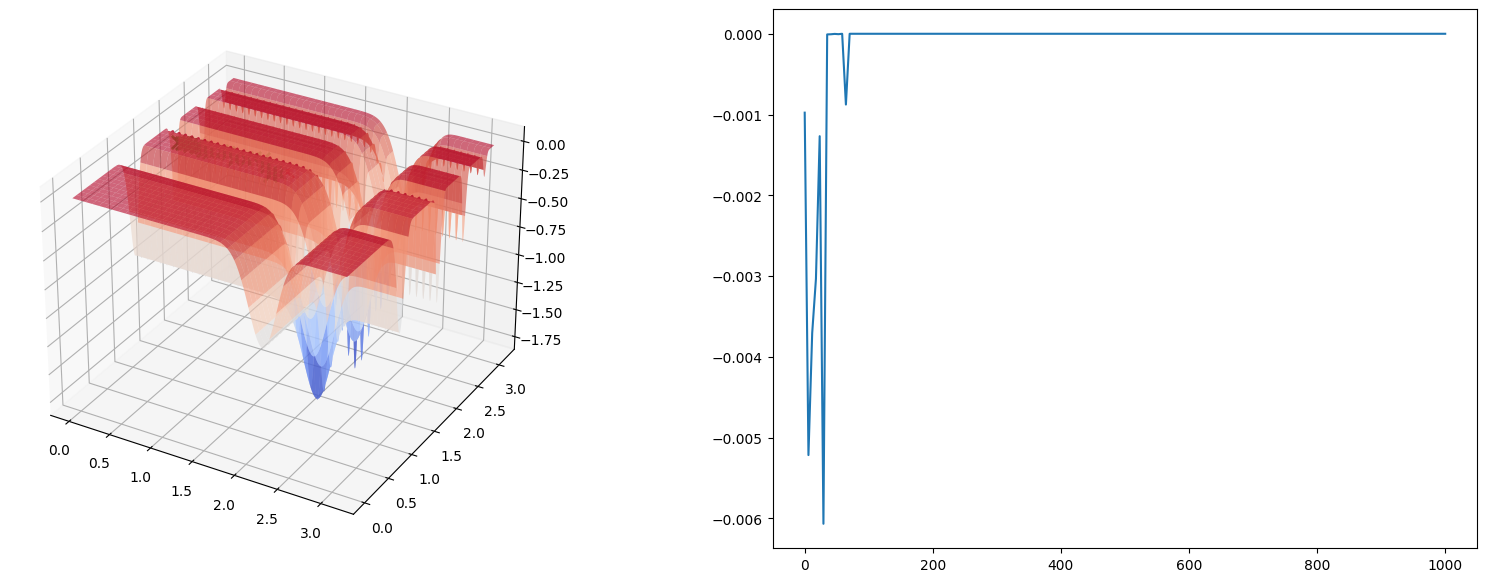

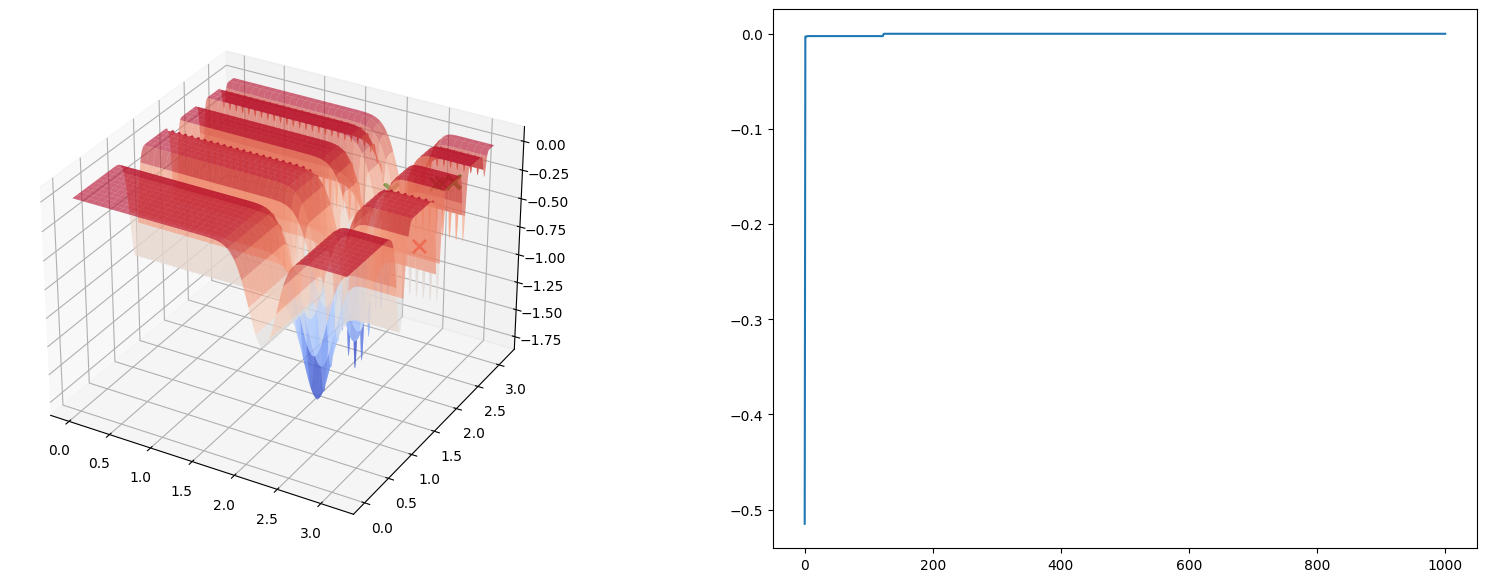

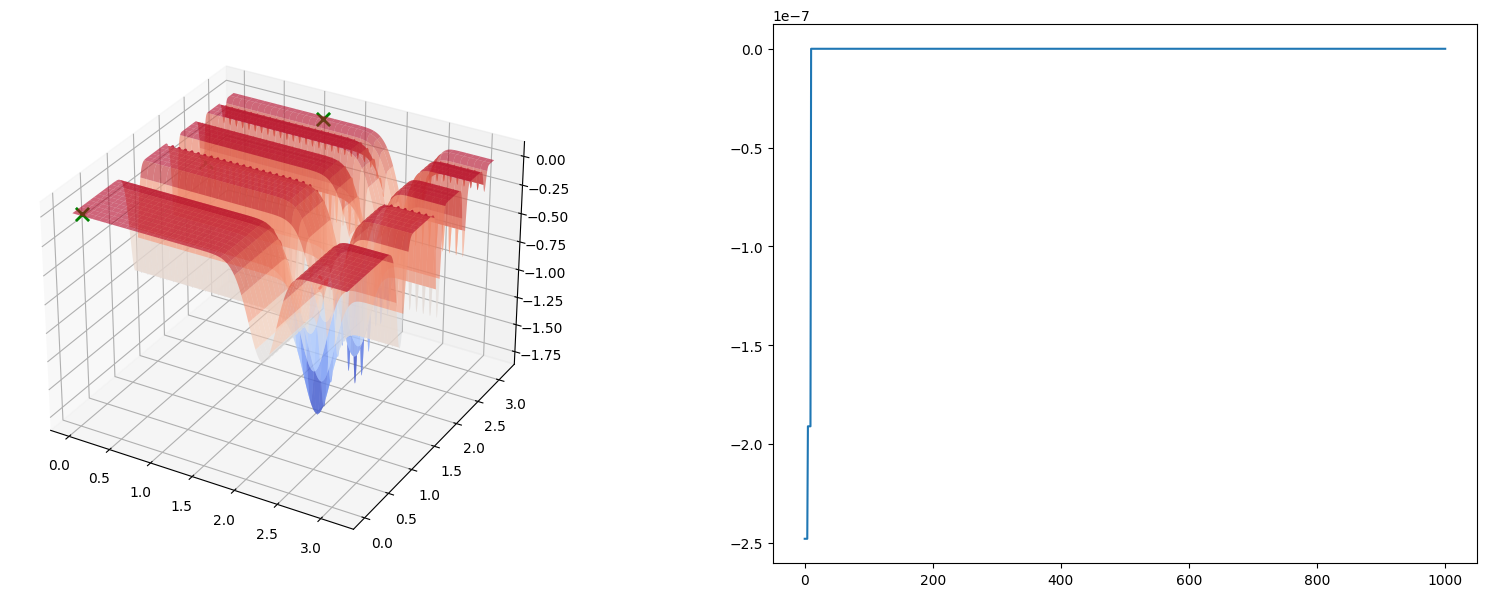

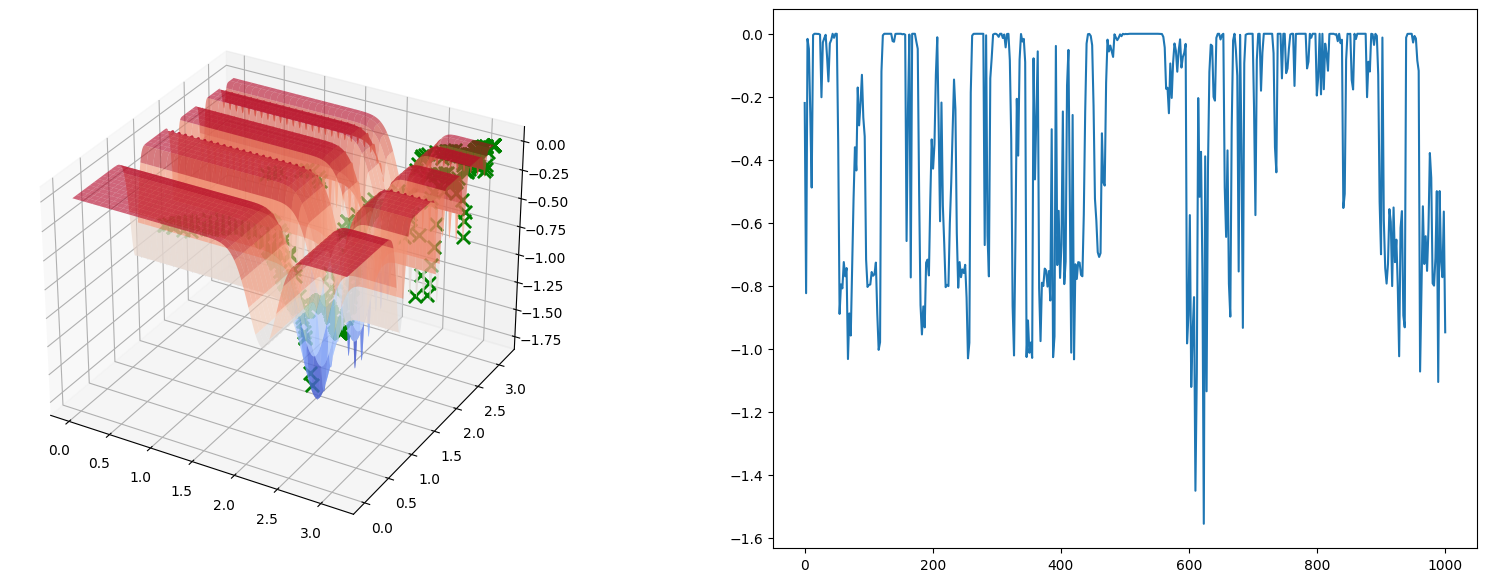

In [ ]:
def f(x1, x2):
  termo_1 = np.sin(x1) * np.sin((x1**2)/np.pi)**(2*10)
  termo_2 = np.sin(x2) * np.sin(((2*x2)**2)/np.pi)**(2*10)
  return -termo_1 - termo_2

x1 = np.linspace(0, np.pi, 2000)
x2 = np.linspace(0, np.pi, 2000)

hill_climbing_plot(x1,x2,f,0.1, np.mean)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)


# $f(x,y) = -(y + 47) \cdot sin(\sqrt{|x/2 + (y + 47)|}) - x \cdot sin(\sqrt{|x - (y + 47)|}) $

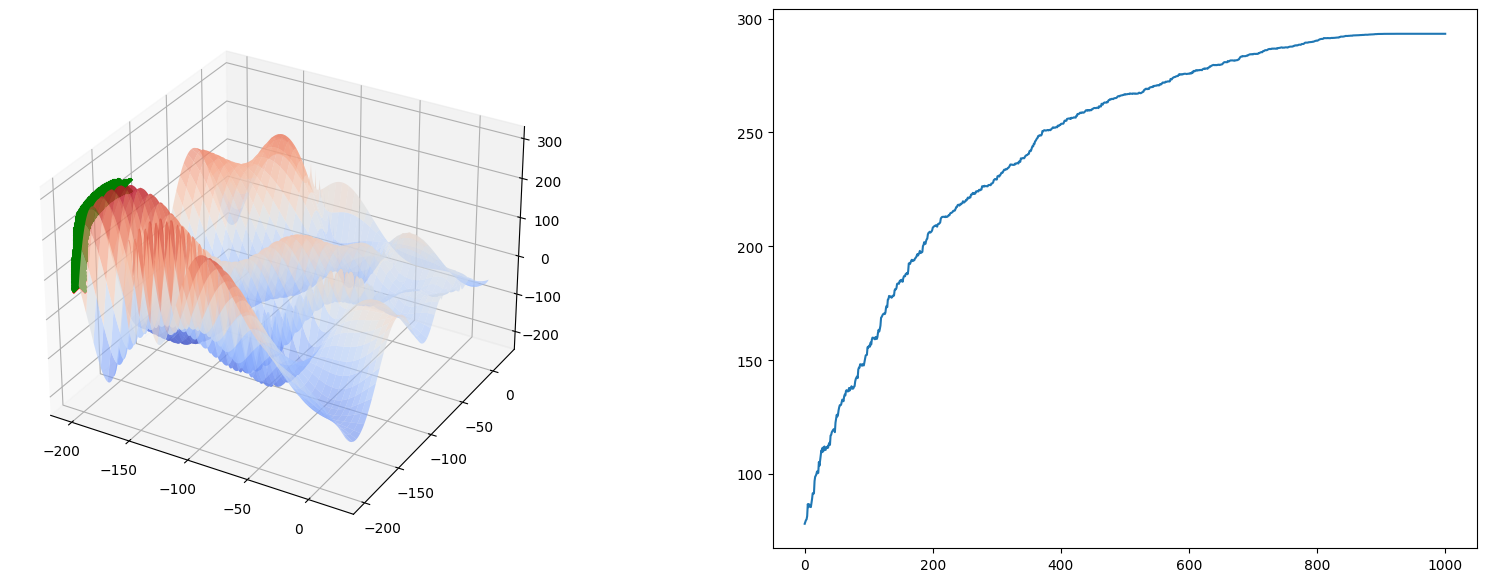

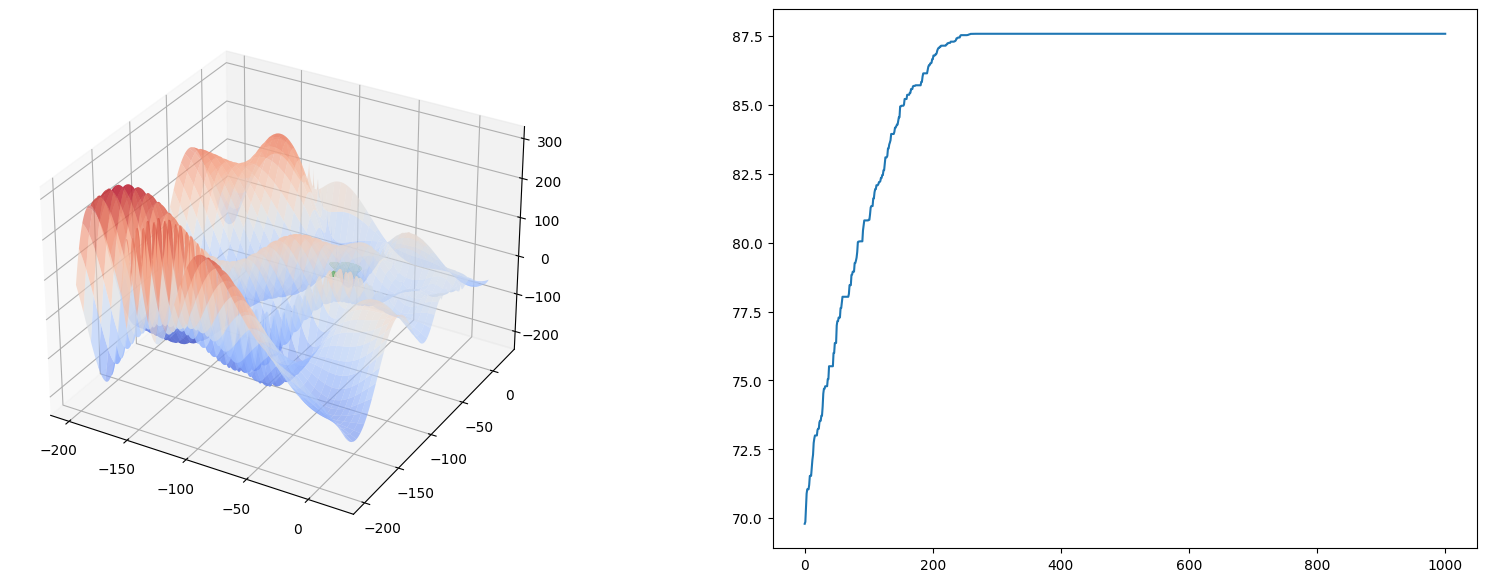

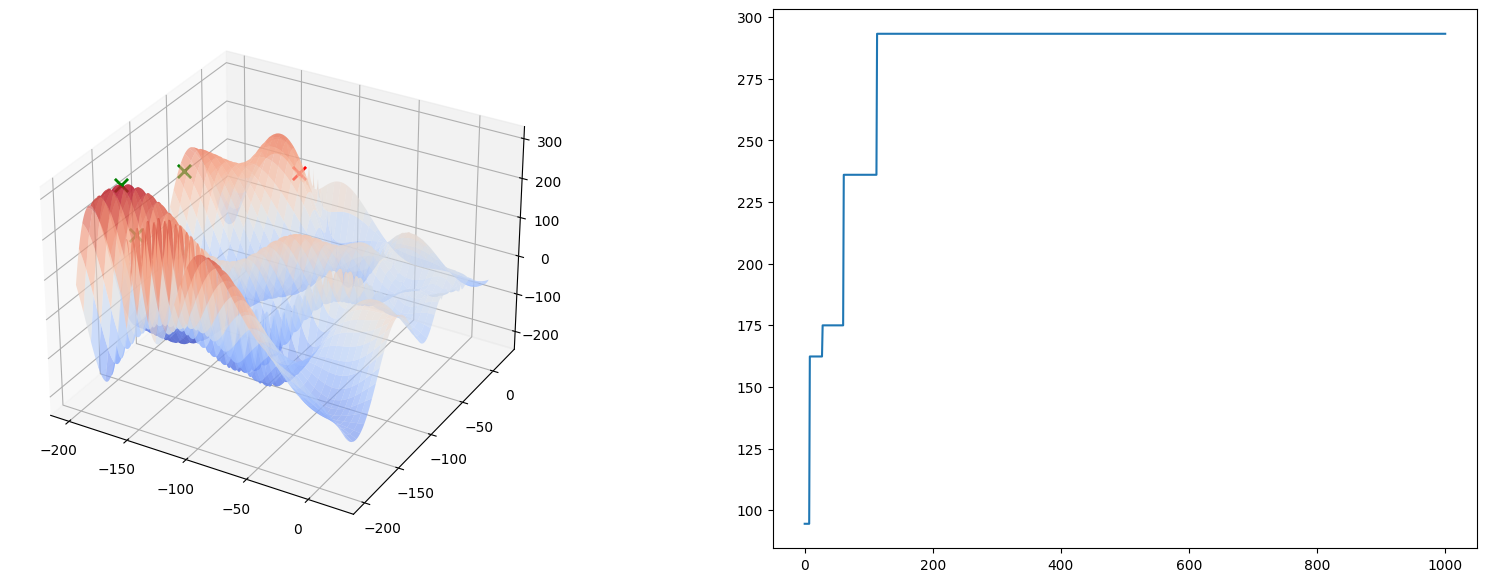

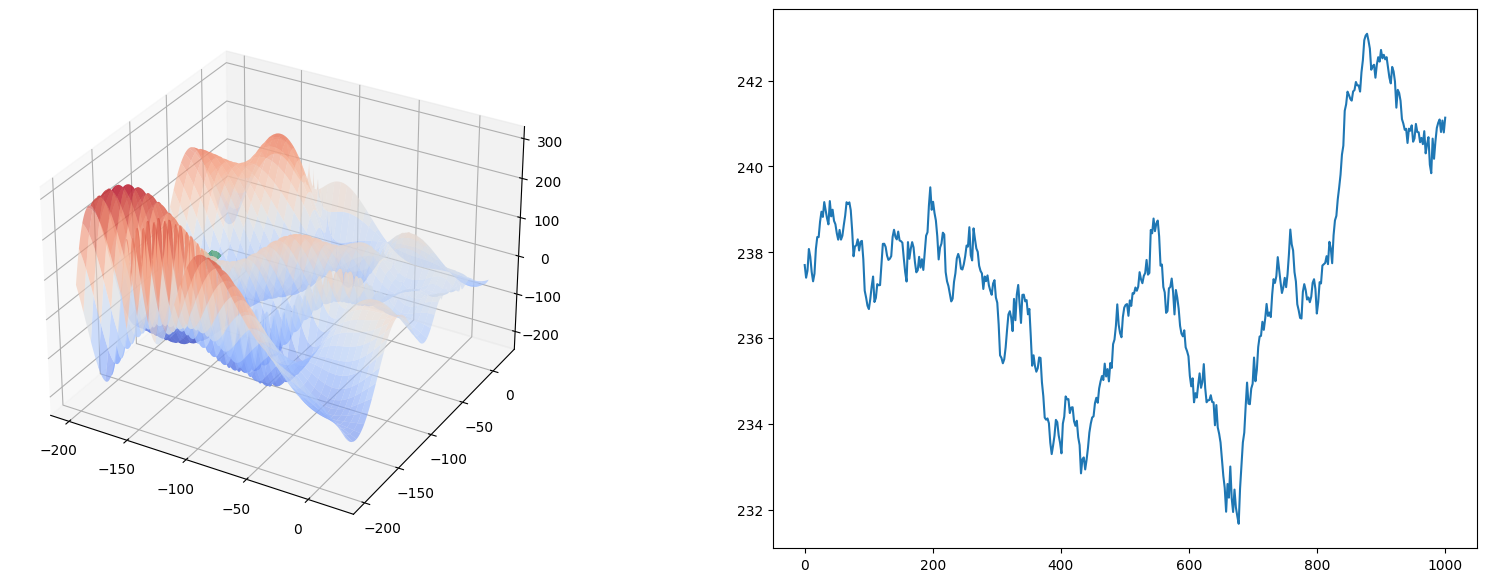

In [ ]:
def f(x1, x2):
  termo_1 = (x2 + 47) * np.sin(np.sqrt(abs((x1/2) + (x2 + 47))))
  termo_2 = x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))
  return -termo_1 - termo_2

x1 = np.linspace(-200, 20, 2000)
x2 = np.linspace(-200, 20, 2000)

hill_climbing_plot(x1,x2,f,0.1)
local_random_search_plot(x1,x2,f,0.1)
global_random_search_plot(x1,x2,f)
simulated_annealing_plot(x1,x2,f,0.1,100,1,1)


# Gerar Pontos Caixeiro Viajante

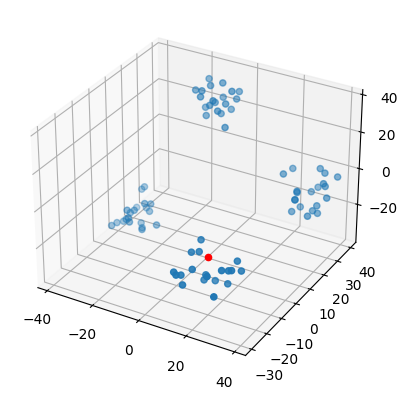

In [ ]:
def gerar_pontos3D(N:int)->np.ndarray:
        '''
        Esta função gera pontos aleatórios em um espaço tridimensional.
        Desta massa de pontos, um destes é selecionado e removido para ser o ponto inicial da rota.

        '''
        x_partition = np.random.uniform(-10, 10, size=(N,3))
        y_partition = np.random.uniform(0, 20, size=(N,3))
        z_partition = np.random.uniform(-20, 0, size=(N,3))
        w_partition = np.random.uniform(0, 20, size=(N,3))

        x1 = np.array([[20,-20,-20]])
        x1 = np.tile(x1,(N,1))
        x_partition = x_partition + x1

        x1 = np.array([[-20,20,20]])
        x1 = np.tile(x1,(N,1))
        y_partition = y_partition + x1

        x1 = np.array([[-20,20,-20]])
        x1 = np.tile(x1,(N,1))
        z_partition = z_partition + x1

        x1 = np.array([[20,20,-20]])
        x1 = np.tile(x1,(N,1))
        w_partition = w_partition + x1
        Pontos = np.concatenate((x_partition, y_partition, z_partition, w_partition), axis=0)
        I = np.random.permutation(N*4)
        inicial = I[0]
        ponto_inicial = Pontos[inicial, :].reshape(1,3)
        Pontos = np.delete(Pontos, inicial, axis=0)
        return ponto_inicial, Pontos

ponto_inicial, pontos = gerar_pontos3D(20)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ponto_inicial[:, 0], ponto_inicial[:, 1], ponto_inicial[:, 2], c='red')
ax.scatter(pontos[:, 0], pontos[:, 1], pontos[:, 2])
plt.show()

# Algoritimo Genetico (Caixeiro Viajante)

In [ ]:
def distancia_euclidiana(p1, p2):
  return np.linalg.norm(p1 - p2)

def medir_distancia(cromossomo, anterior = None):
    acc = 0;
    for ponto in cromossomo:
      acc += distancia_euclidiana(anterior, ponto)
      anterior = ponto
    return acc

class CaixeiroViajante:

  def __init__(self, ponto_inicial, pontos) -> None:
    self.ponto_inicial = ponto_inicial
    self.pontos = pontos
    seed = np.random.permutation(self.pontos.shape[0])
    self.lengthMax = pontos.shape[0] + 2
    self.melhores = []
    self.distancia_anterior = np.iinfo(np.int32).max
    self.metodos = {1:0, 2:0, 3:0, 4:0}


  def gerar_populacao(self, qtd = 30, metodo=1):
    for _ in range(qtd):
      if metodo == 2:
        if len(self.melhores) >= 2:
          parents = np.random.choice(len(self.melhores)),np.random.choice(len(self.melhores))
          filho_1,filho_2 = self.gerar_cromossomo(metodo=2, pai=self.melhores[parents[0]], mae=self.melhores[parents[1]])
          yield filho_1
          yield filho_2
      if metodo == 3:
        if len(self.melhores) > 0:
          yield self.gerar_cromossomo(metodo=3)
      yield self.gerar_cromossomo(metodo = 1)

  def gerar_cromossomo(self, metodo=1, pai=None, mae=None):
    if metodo == 2:
      return self.crossover(pai, mae);
    if metodo == 3:
      return self.melhores[np.random.choice(len(self.melhores))]
    seed = np.random.permutation(self.pontos.shape[0])
    return np.concatenate((self.ponto_inicial, self.pontos[seed, :], self.ponto_inicial), axis = 0)


  def crossover(self, pai, mae):
    filho_1 = np.empty(pai.shape)
    filho_2 = np.empty(pai.shape)
    for i in range(1, len(pai)):
      if np.random.randint(low=1,high=3) == 1:
        filho_1[i] = pai[i]
        filho_2[i] = mae[i]
      else:
        filho_1[i] = mae[i]
        filho_2[i] = pai[i]
    if np.random.uniform(0, 100) <=1: # probabilidade de mutacao
      self.metodos[4] += 1
      filho_1[np.random.choice(len(filho_1))] = pai[np.random.choice(len(filho_1))]
      filho_2[np.random.choice(len(filho_2))] = mae[np.random.choice(len(filho_2))]
    return (filho_1, filho_2)

  def aptidao(self, cromossomos):
    for cromossomo in cromossomos:
      distancia = medir_distancia(cromossomo, self.ponto_inicial)
      if distancia <= self.distancia_anterior:
        self.distancia_anterior = distancia
        self.melhores.append(cromossomo)


  def run(self, max_it = 1000, metodo = 1, max_populacao=100):
    for t in range(1, max_it):
      if callable(max_populacao):
        max_populacao = max_populacao(t)
      populacao = self.gerar_populacao(max_populacao, metodo=metodo)
      self.aptidao(populacao)
      # print(self.distancia_anterior)
      metodo = np.random.randint(low=1, high=4)
      self.metodos[metodo] += 1

  def __str__(self):
    return "menor distacia obtita: %s, %s" % (self.distancia_anterior, str(self.metodos))



FIM
menor distacia obtita: 3105.2294291427884, {1: 3331, 2: 3291, 3: 3377, 4: 21}
FIM
menor distacia obtita: 2628.395141523955, {1: 333, 2: 333, 3: 333, 4: 319}


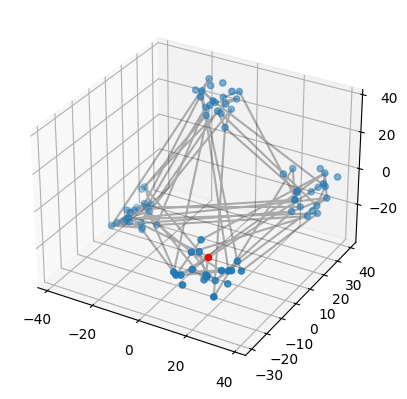

In [ ]:
gen = CaixeiroViajante(ponto_inicial, pontos)
gen.run(10000, max_populacao=lambda x: x**2)

print("FIM")
print(gen)

gen = CaixeiroViajante(ponto_inicial, pontos)
gen.run(1000, max_populacao=100)

print("FIM")
print(gen)


# gen.melhores

melhor = gen.melhores[-1]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(ponto_inicial[:, 0], ponto_inicial[:, 1], ponto_inicial[:, 2], c='red')
ax.scatter(pontos[:, 0], pontos[:, 1], pontos[:, 2])
ax.plot(melhor[:, 0], melhor[:, 1], melhor[:, 2],c='black', alpha=0.3)
plt.show()

# Algoritimo Genetico (8 rainhas)

In [ ]:
def compute_attacks(board):
    size = len(board)
    attacks = 0

    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j]:
                # Ataque horizontal
                attacks += 1

            if abs(i - j) == abs(board[i] - board[j]):
                # Ataque diagonal
                attacks += 1

    return attacks

def print_board(board):
    size = len(board)

    for row in range(size):
        line = ""
        for col in range(size):
            if board[row] == col:
                line += "[亗]"  # Rainha presente na posição (row, col)
            else:
                line += "[☐]"  # Casa vazia

        print(line)

# Exemplo de configuração do tabuleiro
board = [0, 3, 1, 6, 4, 7, 5, 2]

print_board(board)

[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][亗][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][亗][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][☐][亗]
[☐][☐][☐][☐][☐][亗][☐][☐]
[☐][☐][亗][☐][☐][☐][☐][☐]


In [ ]:
def generate_board(num=8):
  return [np.random.randint(low=0,high=8) for _ in range(num)]

print_board(generate_board())

[☐][☐][☐][☐][☐][亗][☐][☐]
[☐][☐][☐][☐][☐][亗][☐][☐]
[☐][☐][☐][☐][☐][亗][☐][☐]
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][☐][☐][亗][☐][☐][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]


In [ ]:
class EightQueens:

  def __init__(self):
    self.melhores = []
    self.zero_attacks = []
    self.metodos = {1:0, 2:0, 3:0, 4:0}

  def gerar_populacao(self, qtd = 30, metodo=1):
     for _ in range(qtd):
        if metodo == 2: # crossover
          if len(self.melhores) >= 2:
            parents = np.random.choice(len(self.melhores)),np.random.choice(len(self.melhores))
            filho_1,filho_2 = self.crossover(pai=self.melhores[parents[0]], mae=self.melhores[parents[1]])
            yield filho_1
            yield filho_2
        if metodo == 3: # elitismo
         if len(self.melhores) >= 2:
          yield self.melhores[np.random.choice(len(self.melhores))]
        yield generate_board() # aleatorio

  def crossover(self, pai, mae):
    filho_1 = np.empty(len(pai))
    filho_2 = np.empty(len(pai))
    for i in range(0, len(pai)):
      if np.random.randint(low=1,high=3) == 1: # faixas de mutacao
        filho_1[i] = pai[i]
        filho_2[i] = mae[i]
      else:
        filho_1[i] = mae[i]
        filho_2[i] = pai[i]
    if np.random.uniform(0, 100) <=1: # probabilidade de mutacao
      self.metodos[4] += 1
      filho_1[np.random.choice(len(filho_1))] = np.random.randint(low=0, high=7)
      filho_2[np.random.choice(len(filho_2))] = np.random.randint(low=0, high=7)
    return (filho_1, filho_2)

  def selecao(self, populacao):
    pop = dict();
    idx_sel = None
    max_attacks = np.iinfo(np.int32).max
    for idx, ind in enumerate(populacao):
      pop[idx] = ind
      if compute_attacks(ind) <= max_attacks:
        idx_sel = idx
        max_attacks = compute_attacks(ind)
    return pop[idx_sel]

  def run(self, max_it = 1000, metodo = 1, max_populacao=100):
    for t in range(1, max_it):
      if callable(max_populacao):
        max_populacao = max_populacao(t)
      populacao = self.gerar_populacao(max_populacao, metodo=metodo)
      ind = self.selecao(populacao)
      print("qtd ataques: " + str(compute_attacks(ind)))
      print_board(ind)
      self.melhores.append(ind)
      if compute_attacks(ind) == 0:
        self.zero_attacks.append(ind)
      n = np.random.randint(low=1, high=4)
      if n == 2:
        p =   np.random.randint(low=0, high=100)
        if p > 85 and p < 95:
          metodo = 2
      metodo = n
      self.metodos[metodo] += 1
      print()
      print("=" * 80)
      print()

  def print(self):
    print()
    print("=" * 80)
    print("qtd mutacoes: " + str(self.metodos[4]) )
    print("aleatorio: " + str(self.metodos[1]))
    print("crossover: " + str(self.metodos[2]))
    print("elitismo: " + str(self.metodos[3]))

    print("-" * 80)
    for _, melhor in zip(range(10), self.melhores):
      print("qtd ataques: " + str(compute_attacks(melhor)))
      print("configuracao: " + str(melhor))
      print_board(melhor)

    print("-" * 80)
    for _, zero in zip(range(10), self.zero_attacks):
      print("qtd ataques: " + str(0))
      print("configuracao: " + str(zero))
      print_board(zero)

In [ ]:
queen = EightQueens()
queen.run(max_populacao=100)
queen.print()


A saída de streaming foi truncada nas últimas 5000 linhas.
[☐][☐][☐][亗][☐][☐][☐][☐]


qtd ataques: 0
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][亗][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][☐][亗]
[☐][☐][☐][☐][☐][亗][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][亗][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][亗][☐]


qtd ataques: 0
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][亗][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][☐][亗]
[☐][☐][☐][☐][☐][亗][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][亗][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][亗][☐]


qtd ataques: 0
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][亗][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][☐][亗]
[☐][☐][☐][☐][☐][亗][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][亗][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][亗][☐]


qtd ataques: 3
[☐][亗][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][亗][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][☐][亗]
[☐][☐][亗][☐][☐][☐][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐][☐][☐][☐][☐][亗][☐]
[☐][☐][☐][☐][亗][☐][☐][☐]


qtd ataques: 2
[亗][☐][☐][☐][☐][☐][☐][☐]
[☐][☐]